In [2]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
import matplotlib.pyplot as plt
from scipy.stats import poisson
from astropy.io import ascii
#from sklearn.linear_model import LinearRegression
#import seaborn as sns
import pandas as pd
from astropy.table import Table
from astropy.io import fits
from scipy.odr import *
import os
import astropy
import astropy.units as u
from astropy.coordinates import SkyCoord
def match_catalogs(samp_x, samp_y, cat_x, cat_y, max_sep=0.1*u.arcsec):
    if not isinstance(max_sep, astropy.units.quantity.Quantity):
        max_sep = max_sep * u.degree
    sample = SkyCoord(ra=samp_x*u.degree, dec=samp_y*u.degree)
    catalog = SkyCoord(ra=cat_x*u.degree, dec=cat_y*u.degree)
    idx, d2d, d3d = sample.match_to_catalog_sky(catalog)
    samp_sel = d2d < max_sep
    return samp_sel, idx
#import seaborn as sns
from scipy import stats

In [9]:
#hduweb=fits.open('2024PASSAGE/COSMOSWeb_mastercatalog_v1_lephare.fits')
hdu=fits.open('2024PASSAGE/COSMOSWeb_mastercatalog_v1.fits')
#hduweb.info()
hdu[1].header

XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                 2843 / length of dimension 1                          
NAXIS2  =               784016 / length of dimension 2                          
PCOUNT  =                    0 / number of group parameters                     
GCOUNT  =                    1 / number of groups                               
TFIELDS =                  287 / number of table fields                         
EXTNAME = 'PHOTOMETRY HOTCOLD AND SE++' / extension name                        
TTYPE1  = 'id      '                                                            
TFORM1  = 'K       '                                                            
TTYPE2  = 'segment-id'                                                          
TFORM2  = 'K       '        

In [120]:
hdu20=fits.open('COSMOS2020_CLASSIC_R1_v2.2_p3.fits')
hdu20[1].header


XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                 3491 / length of dimension 1                          
NAXIS2  =              1720700 / length of dimension 2                          
PCOUNT  =                    0 / number of group parameters                     
GCOUNT  =                    1 / number of groups                               
TFIELDS =                  754 / number of table fields                         
EXTNAME = 'PHASE3CATALOG'                                                       
TTYPE1  = 'ID      '                                                            
TCOMM1  = 'ID (specifically ID_CLASSIC, as this is the Classic catalogue)'      
TUCD1   = 'meta.id;meta.main'                                                   
TFORM1  = 'K       '        

In [284]:
file_path_class1 = '2024PASSAGE/Par024lines_reconciled_with_flags.dat'
df1 = pd.read_csv(file_path_class1,header=0, comment='#',sep='\s+')
df1

samp_x = np.array(df1['ra_obj'])#.data
samp_y = np.array(df1['dec_obj'])#.data
cat_x = hdu[1].data['ra      ']#dat['ra      ']#.data
cat_y = hdu[1].data['dec     ']#dat['dec     ']#.data
#print(samp_x)

sel_samp, idx = match_catalogs(samp_x, samp_y, cat_x, cat_y,max_sep=0.1*u.arcsec)

tt = np.ones(shape=(len(np.array(df1['ra_obj'])),)) * (-1)
tt[sel_samp] = hdu[1].data['ra      '][idx[sel_samp]]

tt2 = np.ones(shape=(len(np.array(df1['ra_obj'])),)) * (-1)
tt2[sel_samp] = hdu[1].data['dec     '][idx[sel_samp]]

tt3 = np.ones(shape=(len(np.array(df1['ra_obj'])),)) * (-1)
tt3[sel_samp] = hdu[1].data['id      '][idx[sel_samp]]

tt4 = np.ones(shape=(len(np.array(df1['ra_obj'])),)) * (-1)
tt4[sel_samp] = hdu[2].data['zfinal  '][idx[sel_samp]]

tt5 = np.ones(shape=(len(np.array(df1['ra_obj'])),)) * (-1)
tt5[sel_samp] = hdu[2].data['zpdf_med'][idx[sel_samp]]

tt6 = np.ones(shape=(len(np.array(df1['ra_obj'])),)) * (-1)
tt6[sel_samp] = hdu[2].data['zpdf_l68'][idx[sel_samp]]

tt7 = np.ones(shape=(len(np.array(df1['ra_obj'])),)) * (-1)
tt7[sel_samp] = hdu[2].data['zpdf_u68'][idx[sel_samp]]


df1['cosmosra']=tt
df1['cosmosdec']=tt2
df1['cosmosid']=tt3
df1['cosmosz']=tt4
df1['cosmoszmed']=tt5
df1['cosmoszlow']=tt6
df1['cosmoszup']=tt7

df1


,objid,redshift,redshift_error,ra_obj,dec_obj,f140w_mag,a_image_obj,b_image_obj,snr_tot_others,chisq,...,snr_Pb,snr_SIII,emline_flag,cosmosra,cosmosdec,cosmosid,cosmosz,cosmoszmed,cosmoszlow,cosmoszup
0,8,1.96988,0.00000,150.142174,2.476397,25.52,3.587,2.976,7.33,9.88,...,-1.0,-1.0,2,-1.000000,-1.000000,-1.0,-1.0000,-1.0000,-1.0000,-1.0000
1,9,1.97364,0.00025,150.142183,2.476540,24.11,4.029,2.975,41.54,15.14,...,-1.0,-1.0,1,150.142181,2.476513,431674.0,1.6867,1.6867,1.6800,1.7000
2,31,0.81933,0.00000,150.143154,2.478128,26.57,2.899,2.584,8.65,9.35,...,-1.0,-1.0,4,150.143155,2.478125,431943.0,1.6826,1.6826,1.1410,1.9177
3,91,2.11985,0.00115,150.144131,2.480157,24.91,3.009,2.087,10.53,10.20,...,-1.0,-1.0,2,150.144135,2.480148,432297.0,2.3428,2.3428,2.3110,2.3612
4,143,2.13190,0.00000,150.133466,2.481628,24.23,6.425,3.035,9.00,15.09,...,-1.0,-1.0,1,150.133470,2.481622,431949.0,2.1160,2.1160,2.0821,2.1656
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124,3703,1.42841,0.00177,150.126082,2.517314,25.87,3.036,2.688,9.20,14.32,...,-1.0,-1.0,2,150.126085,2.517304,436410.0,1.5006,1.5006,1.3445,1.6353
125,3713,2.28332,0.00099,150.131621,2.517379,24.77,4.382,3.210,4.47,13.08,...,-1.0,-1.0,2,150.131626,2.517370,436749.0,2.1674,2.1674,2.0829,2.2813
126,3721,0.59215,0.00041,150.119086,2.517642,25.10,4.774,2.951,0.00,-5.07,...,-1.0,-1.0,9,150.119100,2.517639,436079.0,1.0498,1.0498,1.0347,1.0677
127,3726,2.29374,0.00209,150.127834,2.517718,25.25,4.258,2.594,3.12,10.53,...,-1.0,-1.0,4,150.127841,2.517710,436589.0,2.2051,2.2051,2.1171,2.3190


In [285]:
file_path_class1 = '2024PASSAGE/Par051lines_reconciled_with_flags.dat'
df2 = pd.read_csv(file_path_class1,header=0, comment='#', sep='\s+')

samp_x = np.array(df2['ra_obj'])#.data
samp_y = np.array(df2['dec_obj'])#.data
cat_x = hdu[1].data['ra      ']#dat['ra      ']#.data
cat_y = hdu[1].data['dec     ']#dat['dec     ']#.data
#print(samp_x)

sel_samp, idx = match_catalogs(samp_x, samp_y, cat_x, cat_y,max_sep=0.1*u.arcsec)

tt = np.ones(shape=(len(np.array(df2['ra_obj'])),)) * (-1)
tt[sel_samp] = hdu[1].data['ra      '][idx[sel_samp]]

tt2 = np.ones(shape=(len(np.array(df2['ra_obj'])),)) * (-1)
tt2[sel_samp] = hdu[1].data['dec     '][idx[sel_samp]]

tt3 = np.ones(shape=(len(np.array(df2['ra_obj'])),)) * (-1)
tt3[sel_samp] = hdu[1].data['id      '][idx[sel_samp]]

tt4 = np.ones(shape=(len(np.array(df2['ra_obj'])),)) * (-1)
tt4[sel_samp] = hdu[2].data['zfinal  '][idx[sel_samp]]

tt5 = np.ones(shape=(len(np.array(df2['ra_obj'])),)) * (-1)
tt5[sel_samp] = hdu[2].data['zpdf_med'][idx[sel_samp]]

tt6 = np.ones(shape=(len(np.array(df2['ra_obj'])),)) * (-1)
tt6[sel_samp] = hdu[2].data['zpdf_l68'][idx[sel_samp]]

tt7 = np.ones(shape=(len(np.array(df2['ra_obj'])),)) * (-1)
tt7[sel_samp] = hdu[2].data['zpdf_u68'][idx[sel_samp]]


df2['cosmosra']=tt
df2['cosmosdec']=tt2
df2['cosmosid']=tt3
df2['cosmosz']=tt4
df2['cosmoszmed']=tt5
df2['cosmoszlow']=tt6
df2['cosmoszup']=tt7




In [286]:
df22=df2
df22=df22[df22['cosmosid'] == -1]

samp_x = np.array(df22['ra_obj'])#.data
samp_y = np.array(df22['dec_obj'])#.data
cat_x = hdu20[1].data['ALPHA_J2000']#dat['ra      ']#.data
cat_y = hdu20[1].data['DELTA_J2000']#dat['dec     ']#.data

sel_samp, idx = match_catalogs(samp_x, samp_y, cat_x, cat_y,max_sep=0.1*u.arcsec)

tt = np.ones(shape=(len(np.array(df22['ra_obj'])),)) * (-1)
tt[sel_samp] = hdu20[1].data['ALPHA_J2000'][idx[sel_samp]]

tt2 = np.ones(shape=(len(np.array(df22['ra_obj'])),)) * (-1)
tt2[sel_samp] = hdu20[1].data['DELTA_J2000'][idx[sel_samp]]

tt3 = np.ones(shape=(len(np.array(df22['ra_obj'])),)) * (-1)
tt3[sel_samp] = hdu20[1].data['ID'][idx[sel_samp]]

tt4 = np.ones(shape=(len(np.array(df22['ra_obj'])),)) * (-1)
tt4[sel_samp] = hdu20[1].data['lp_zBEST'][idx[sel_samp]]

tt6 = np.ones(shape=(len(np.array(df22['ra_obj'])),)) * (-1)
tt6[sel_samp] = hdu20[1].data['lp_zPDF_l68'][idx[sel_samp]]

tt7 = np.ones(shape=(len(np.array(df22['ra_obj'])),)) * (-1)
tt7[sel_samp] = hdu20[1].data['lp_zPDF_u68'][idx[sel_samp]]



df22['cosmos2020ra']=tt
df22['cosmos2020dec']=tt2
df22['cosmos2020id']=tt3
df22['cosmos2020z']=tt4
df22['cosmos2020zlow']=tt6
df22['cosmos2020zup']=tt7
df22

/tmp/ipykernel_2290997/2240034000.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df22['cosmos2020ra']=tt
/tmp/ipykernel_2290997/2240034000.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df22['cosmos2020dec']=tt2
/tmp/ipykernel_2290997/2240034000.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/inde

,objid,redshift,redshift_error,ra_obj,dec_obj,f140w_mag,a_image_obj,b_image_obj,snr_tot_others,chisq,...,cosmosz,cosmoszmed,cosmoszlow,cosmoszup,cosmos2020ra,cosmos2020dec,cosmos2020id,cosmos2020z,cosmos2020zlow,cosmos2020zup
0,43,1.42446,0.00056,150.508911,2.242165,21.98,7.809,6.795,0.00,-4.06,...,-1.0,-1.0,-1.0,-1.0,150.508915,2.242168,866469.0,NaN,1.4176,1.4816
1,99,0.71327,0.00067,150.502323,2.244129,25.82,3.127,2.368,15.44,-2.68,...,-1.0,-1.0,-1.0,-1.0,150.502329,2.244149,866659.0,NaN,0.8092,1.8747
5,175,0.84091,0.00000,150.505076,2.245905,23.40,6.405,4.600,12.59,-12.07,...,-1.0,-1.0,-1.0,-1.0,150.505091,2.245892,869335.0,NaN,1.3387,1.4281
6,262,0.83280,0.00113,150.505114,2.247464,25.34,4.901,2.701,6.09,-1.82,...,-1.0,-1.0,-1.0,-1.0,150.505116,2.247453,870432.0,NaN,1.1603,1.7538
8,450,0.86211,0.00000,150.505311,2.249965,24.27,5.787,3.827,0.00,-5.16,...,-1.0,-1.0,-1.0,-1.0,150.505311,2.249962,873734.0,NaN,2.1225,2.3959
10,557,0.89893,0.00000,150.512166,2.250914,24.71,4.624,2.657,28.32,-16.41,...,-1.0,-1.0,-1.0,-1.0,-1.000000,-1.000000,-1.0,-1.0000,-1.0000,-1.0000
12,615,0.88483,0.00000,150.514321,2.251821,25.71,4.314,2.157,6.76,-3.89,...,-1.0,-1.0,-1.0,-1.0,150.514325,2.251825,875295.0,NaN,2.3492,2.8454
17,931,0.82105,0.00123,150.510925,2.254479,24.64,3.900,3.608,5.52,-2.48,...,-1.0,-1.0,-1.0,-1.0,150.510936,2.254469,878685.0,NaN,0.7979,1.1654
22,1377,0.84037,0.00000,150.517505,2.258259,21.57,9.762,7.299,52.62,-17.06,...,-1.0,-1.0,-1.0,-1.0,150.517508,2.258269,885862.0,0.7749,0.7463,0.8380
25,1424,0.61967,0.00078,150.499056,2.259432,23.90,5.622,3.376,20.43,-4.82,...,-1.0,-1.0,-1.0,-1.0,-1.000000,-1.000000,-1.0,-1.0000,-1.0000,-1.0000


In [287]:
file_path_class1 = '2024PASSAGE/Par025lines_reconciled_with_flags.dat'
df3 = pd.read_csv(file_path_class1,header=0, comment='#',sep='\s+')
samp_x = np.array(df3['ra_obj'])#.data
samp_y = np.array(df3['dec_obj'])#.data
cat_x = hdu[1].data['ra      ']#dat['ra      ']#.data
cat_y = hdu[1].data['dec     ']#dat['dec     ']#.data
#print(samp_x)

sel_samp, idx = match_catalogs(samp_x, samp_y, cat_x, cat_y,max_sep=0.1*u.arcsec)

tt = np.ones(shape=(len(np.array(df3['ra_obj'])),)) * (-1)
tt[sel_samp] = hdu[1].data['ra      '][idx[sel_samp]]

tt2 = np.ones(shape=(len(np.array(df3['ra_obj'])),)) * (-1)
tt2[sel_samp] = hdu[1].data['dec     '][idx[sel_samp]]

tt3 = np.ones(shape=(len(np.array(df3['ra_obj'])),)) * (-1)
tt3[sel_samp] = hdu[1].data['id      '][idx[sel_samp]]

tt4 = np.ones(shape=(len(np.array(df3['ra_obj'])),)) * (-1)
tt4[sel_samp] = hdu[2].data['zfinal  '][idx[sel_samp]]

tt5 = np.ones(shape=(len(np.array(df3['ra_obj'])),)) * (-1)
tt5[sel_samp] = hdu[2].data['zpdf_med'][idx[sel_samp]]

tt6 = np.ones(shape=(len(np.array(df3['ra_obj'])),)) * (-1)
tt6[sel_samp] = hdu[2].data['zpdf_l68'][idx[sel_samp]]

tt7 = np.ones(shape=(len(np.array(df3['ra_obj'])),)) * (-1)
tt7[sel_samp] = hdu[2].data['zpdf_u68'][idx[sel_samp]]


df3['cosmosra']=tt
df3['cosmosdec']=tt2
df3['cosmosid']=tt3
df3['cosmosz']=tt4
df3['cosmoszmed']=tt5
df3['cosmoszlow']=tt6
df3['cosmoszup']=tt7




In [288]:
file_path_class1 = '2024PASSAGE/Par023lines_reconciled_with_flags.dat'
df4 = pd.read_csv(file_path_class1,header=0, comment='#',sep='\s+')
samp_x = np.array(df4['ra_obj'])#.data
samp_y = np.array(df4['dec_obj'])#.data
cat_x = hdu[1].data['ra      ']#dat['ra      ']#.data
cat_y = hdu[1].data['dec     ']#dat['dec     ']#.data
#print(samp_x)

sel_samp, idx = match_catalogs(samp_x, samp_y, cat_x, cat_y,max_sep=0.1*u.arcsec)

tt = np.ones(shape=(len(np.array(df4['ra_obj'])),)) * (-1)
tt[sel_samp] = hdu[1].data['ra      '][idx[sel_samp]]

tt2 = np.ones(shape=(len(np.array(df4['ra_obj'])),)) * (-1)
tt2[sel_samp] = hdu[1].data['dec     '][idx[sel_samp]]

tt3 = np.ones(shape=(len(np.array(df4['ra_obj'])),)) * (-1)
tt3[sel_samp] = hdu[1].data['id      '][idx[sel_samp]]

tt4 = np.ones(shape=(len(np.array(df4['ra_obj'])),)) * (-1)
tt4[sel_samp] = hdu[2].data['zfinal  '][idx[sel_samp]]

tt5 = np.ones(shape=(len(np.array(df4['ra_obj'])),)) * (-1)
tt5[sel_samp] = hdu[2].data['zpdf_med'][idx[sel_samp]]

tt6 = np.ones(shape=(len(np.array(df4['ra_obj'])),)) * (-1)
tt6[sel_samp] = hdu[2].data['zpdf_l68'][idx[sel_samp]]

tt7 = np.ones(shape=(len(np.array(df4['ra_obj'])),)) * (-1)
tt7[sel_samp] = hdu[2].data['zpdf_u68'][idx[sel_samp]]


df4['cosmosra']=tt
df4['cosmosdec']=tt2
df4['cosmosid']=tt3
df4['cosmosz']=tt4
df4['cosmoszmed']=tt5
df4['cosmoszlow']=tt6
df4['cosmoszup']=tt7




In [301]:
file_path_class1 = '2024PASSAGE/Par053lines_reconciled_with_flags.dat'
df5 = pd.read_csv(file_path_class1,header=0, comment='#',sep='\s+')
samp_x = np.array(df5['ra_obj'])#.data
samp_y = np.array(df5['dec_obj'])#.data
cat_x = hdu[1].data['ra      ']#dat['ra      ']#.data
cat_y = hdu[1].data['dec     ']#dat['dec     ']#.data
#print(samp_x)

sel_samp, idx = match_catalogs(samp_x, samp_y, cat_x, cat_y,max_sep=0.1*u.arcsec)

tt = np.ones(shape=(len(np.array(df5['ra_obj'])),)) * (-1)
tt[sel_samp] = hdu[1].data['ra      '][idx[sel_samp]]

tt2 = np.ones(shape=(len(np.array(df5['ra_obj'])),)) * (-1)
tt2[sel_samp] = hdu[1].data['dec     '][idx[sel_samp]]

tt3 = np.ones(shape=(len(np.array(df5['ra_obj'])),)) * (-1)
tt3[sel_samp] = hdu[1].data['id      '][idx[sel_samp]]

tt4 = np.ones(shape=(len(np.array(df5['ra_obj'])),)) * (-1)
tt4[sel_samp] = hdu[2].data['zfinal  '][idx[sel_samp]]

tt5 = np.ones(shape=(len(np.array(df5['ra_obj'])),)) * (-1)
tt5[sel_samp] = hdu[2].data['zpdf_med'][idx[sel_samp]]

tt6 = np.ones(shape=(len(np.array(df5['ra_obj'])),)) * (-1)
tt6[sel_samp] = hdu[2].data['zpdf_l68'][idx[sel_samp]]

tt7 = np.ones(shape=(len(np.array(df5['ra_obj'])),)) * (-1)
tt7[sel_samp] = hdu[2].data['zpdf_u68'][idx[sel_samp]]


df5['cosmosra']=tt
df5['cosmosdec']=tt2
df5['cosmosid']=tt3
df5['cosmosz']=tt4
df5['cosmoszmed']=tt5
df5['cosmoszlow']=tt6
df5['cosmoszup']=tt7




In [302]:
df52=df5
df52=df52[df52['cosmosid'] == -1]

samp_x = np.array(df52['ra_obj'])#.data
samp_y = np.array(df52['dec_obj'])#.data
cat_x = hdu20[1].data['ALPHA_J2000']#dat['ra      ']#.data
cat_y = hdu20[1].data['DELTA_J2000']#dat['dec     ']#.data

sel_samp, idx = match_catalogs(samp_x, samp_y, cat_x, cat_y,max_sep=0.1*u.arcsec)

tt = np.ones(shape=(len(np.array(df52['ra_obj'])),)) * (-1)
tt[sel_samp] = hdu20[1].data['ALPHA_J2000'][idx[sel_samp]]

tt2 = np.ones(shape=(len(np.array(df52['ra_obj'])),)) * (-1)
tt2[sel_samp] = hdu20[1].data['DELTA_J2000'][idx[sel_samp]]

tt3 = np.ones(shape=(len(np.array(df52['ra_obj'])),)) * (-1)
tt3[sel_samp] = hdu20[1].data['ID'][idx[sel_samp]]

tt4 = np.ones(shape=(len(np.array(df52['ra_obj'])),)) * (-1)
tt4[sel_samp] = hdu20[1].data['lp_zBEST'][idx[sel_samp]]

tt6 = np.ones(shape=(len(np.array(df52['ra_obj'])),)) * (-1)
tt6[sel_samp] = hdu20[1].data['lp_zPDF_l68'][idx[sel_samp]]

tt7 = np.ones(shape=(len(np.array(df52['ra_obj'])),)) * (-1)
tt7[sel_samp] = hdu20[1].data['lp_zPDF_u68'][idx[sel_samp]]



df52['cosmos2020ra']=tt
df52['cosmos2020dec']=tt2
df52['cosmos2020id']=tt3
df52['cosmos2020z']=tt4
df52['cosmos2020zlow']=tt6
df52['cosmos2020zup']=tt7
df52


/tmp/ipykernel_2290997/2452152505.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df52['cosmos2020ra']=tt
/tmp/ipykernel_2290997/2452152505.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df52['cosmos2020dec']=tt2
/tmp/ipykernel_2290997/2452152505.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/inde

,objid,redshift,redshift_error,ra_obj,dec_obj,f140w_mag,a_image_obj,b_image_obj,snr_tot_others,chisq,...,cosmosz,cosmoszmed,cosmoszlow,cosmoszup,cosmos2020ra,cosmos2020dec,cosmos2020id,cosmos2020z,cosmos2020zlow,cosmos2020zup
0,42,1.72120,0.00050,150.107298,1.771812,26.41,4.755,3.218,24.83,30.78,...,-1.0,-1.0,-1.0,-1.0,150.107276,1.771798,366641.0,1.0659,0.8963,1.2268
1,76,2.11829,0.00164,150.104486,1.773287,26.21,4.755,2.636,5.67,-8.83,...,-1.0,-1.0,-1.0,-1.0,-1.000000,-1.000000,-1.0,-1.0000,-1.0000,-1.0000
2,85,2.08843,0.00176,150.100978,1.773589,26.43,5.700,2.528,4.93,-8.32,...,-1.0,-1.0,-1.0,-1.0,150.100994,1.773567,368695.0,NaN,0.0726,0.4175
3,143,2.11868,0.00063,150.103809,1.775298,25.01,6.669,3.981,14.32,-17.51,...,-1.0,-1.0,-1.0,-1.0,-1.000000,-1.000000,-1.0,-1.0000,-1.0000,-1.0000
4,174,3.06035,0.00113,150.108098,1.775918,25.28,4.249,3.390,13.71,-7.61,...,-1.0,-1.0,-1.0,-1.0,-1.000000,-1.000000,-1.0,-1.0000,-1.0000,-1.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78,1385,1.98953,0.00173,150.083750,1.791630,23.84,6.453,4.628,5.09,-31.16,...,-1.0,-1.0,-1.0,-1.0,150.083743,1.791626,388114.0,NaN,1.0567,1.1628
79,1726,1.73094,0.00324,150.086634,1.792008,23.66,15.004,12.424,10.30,21.45,...,-1.0,-1.0,-1.0,-1.0,-1.000000,-1.000000,-1.0,-1.0000,-1.0000,-1.0000
80,1760,1.90693,0.00253,150.106729,1.795688,25.15,8.688,3.780,5.09,-10.86,...,-1.0,-1.0,-1.0,-1.0,150.106742,1.795670,391486.0,2.9012,2.7692,2.9978
81,2204,2.85552,0.00140,150.099152,1.800593,28.13,2.227,1.929,7.50,-11.45,...,-1.0,-1.0,-1.0,-1.0,-1.000000,-1.000000,-1.0,-1.0000,-1.0000,-1.0000


In [291]:
file_path_class1 = '2024PASSAGE/Par026lines_reconciled_with_flags.dat'
df6 = pd.read_csv(file_path_class1,header=0, comment='#',sep='\s+')
samp_x = np.array(df6['ra_obj'])#.data
samp_y = np.array(df6['dec_obj'])#.data
cat_x = hdu[1].data['ra      ']#dat['ra      ']#.data
cat_y = hdu[1].data['dec     ']#dat['dec     ']#.data
#print(samp_x)

sel_samp, idx = match_catalogs(samp_x, samp_y, cat_x, cat_y,max_sep=0.1*u.arcsec)

tt = np.ones(shape=(len(np.array(df6['ra_obj'])),)) * (-1)
tt[sel_samp] = hdu[1].data['ra      '][idx[sel_samp]]

tt2 = np.ones(shape=(len(np.array(df6['ra_obj'])),)) * (-1)
tt2[sel_samp] = hdu[1].data['dec     '][idx[sel_samp]]

tt3 = np.ones(shape=(len(np.array(df6['ra_obj'])),)) * (-1)
tt3[sel_samp] = hdu[1].data['id      '][idx[sel_samp]]

tt4 = np.ones(shape=(len(np.array(df6['ra_obj'])),)) * (-1)
tt4[sel_samp] = hdu[2].data['zfinal  '][idx[sel_samp]]

tt5 = np.ones(shape=(len(np.array(df6['ra_obj'])),)) * (-1)
tt5[sel_samp] = hdu[2].data['zpdf_med'][idx[sel_samp]]

tt6 = np.ones(shape=(len(np.array(df6['ra_obj'])),)) * (-1)
tt6[sel_samp] = hdu[2].data['zpdf_l68'][idx[sel_samp]]

tt7 = np.ones(shape=(len(np.array(df6['ra_obj'])),)) * (-1)
tt7[sel_samp] = hdu[2].data['zpdf_u68'][idx[sel_samp]]


df6['cosmosra']=tt
df6['cosmosdec']=tt2
df6['cosmosid']=tt3
df6['cosmosz']=tt4
df6['cosmoszmed']=tt5
df6['cosmoszlow']=tt6
df6['cosmoszup']=tt7




In [292]:
file_path_class1 = '2024PASSAGE/Par003lines_reconciled_with_flags.dat'
df7 = pd.read_csv(file_path_class1,header=0, comment='#',sep='\s+')
samp_x = np.array(df7['ra_obj'])#.data
samp_y = np.array(df7['dec_obj'])#.data
cat_x = hdu[1].data['ra      ']#dat['ra      ']#.data
cat_y = hdu[1].data['dec     ']#dat['dec     ']#.data
#print(samp_x)

sel_samp, idx = match_catalogs(samp_x, samp_y, cat_x, cat_y,max_sep=0.1*u.arcsec)

tt = np.ones(shape=(len(np.array(df7['ra_obj'])),)) * (-1)
tt[sel_samp] = hdu[1].data['ra      '][idx[sel_samp]]

tt2 = np.ones(shape=(len(np.array(df7['ra_obj'])),)) * (-1)
tt2[sel_samp] = hdu[1].data['dec     '][idx[sel_samp]]

tt3 = np.ones(shape=(len(np.array(df7['ra_obj'])),)) * (-1)
tt3[sel_samp] = hdu[1].data['id      '][idx[sel_samp]]

tt4 = np.ones(shape=(len(np.array(df7['ra_obj'])),)) * (-1)
tt4[sel_samp] = hdu[2].data['zfinal  '][idx[sel_samp]]

tt5 = np.ones(shape=(len(np.array(df7['ra_obj'])),)) * (-1)
tt5[sel_samp] = hdu[2].data['zpdf_med'][idx[sel_samp]]

tt6 = np.ones(shape=(len(np.array(df7['ra_obj'])),)) * (-1)
tt6[sel_samp] = hdu[2].data['zpdf_l68'][idx[sel_samp]]

tt7 = np.ones(shape=(len(np.array(df7['ra_obj'])),)) * (-1)
tt7[sel_samp] = hdu[2].data['zpdf_u68'][idx[sel_samp]]


df7['cosmosra']=tt
df7['cosmosdec']=tt2
df7['cosmosid']=tt3
df7['cosmosz']=tt4
df7['cosmoszmed']=tt5
df7['cosmoszlow']=tt6
df7['cosmoszup']=tt7

In [293]:
file_path_class1 = '2024PASSAGE/Par017lines_catalog_matt_with_flags.dat'
df8 = pd.read_csv(file_path_class1,header=0, comment='#',sep='\s+')
samp_x = np.array(df8['ra_obj'])#.data
samp_y = np.array(df8['dec_obj'])#.data
samp_y=[float(s) for s in samp_y]
cat_x = hdu[1].data['ra      ']#dat['ra      ']#.data
cat_y = hdu[1].data['dec     ']#dat['dec     ']#.data
#print(samp_x)

sel_samp, idx = match_catalogs(samp_x, samp_y, cat_x, cat_y,max_sep=0.1*u.arcsec)

tt = np.ones(shape=(len(np.array(df8['ra_obj'])),)) * (-1)
tt[sel_samp] = hdu[1].data['ra      '][idx[sel_samp]]

tt2 = np.ones(shape=(len(np.array(df8['ra_obj'])),)) * (-1)
tt2[sel_samp] = hdu[1].data['dec     '][idx[sel_samp]]

tt3 = np.ones(shape=(len(np.array(df8['ra_obj'])),)) * (-1)
tt3[sel_samp] = hdu[1].data['id      '][idx[sel_samp]]

tt4 = np.ones(shape=(len(np.array(df8['ra_obj'])),)) * (-1)
tt4[sel_samp] = hdu[2].data['zfinal  '][idx[sel_samp]]

tt5 = np.ones(shape=(len(np.array(df8['ra_obj'])),)) * (-1)
tt5[sel_samp] = hdu[2].data['zpdf_med'][idx[sel_samp]]

tt6 = np.ones(shape=(len(np.array(df8['ra_obj'])),)) * (-1)
tt6[sel_samp] = hdu[2].data['zpdf_l68'][idx[sel_samp]]

tt7 = np.ones(shape=(len(np.array(df8['ra_obj'])),)) * (-1)
tt7[sel_samp] = hdu[2].data['zpdf_u68'][idx[sel_samp]]


df8['cosmosra']=tt
df8['cosmosdec']=tt2
df8['cosmosid']=tt3
df8['cosmosz']=tt4
df8['cosmoszmed']=tt5
df8['cosmoszlow']=tt6
df8['cosmoszup']=tt7

In [294]:
file_path_class1 = '2024PASSAGE/Par028lines_catalog_scarlata_with_flags.dat'
df9 = pd.read_csv(file_path_class1,header=0, comment='#',sep='\s+')
samp_x = np.array(df9['ra_obj'])#.data
samp_y = np.array(df9['dec_obj'])#.data
cat_x = hdu[1].data['ra      ']#dat['ra      ']#.data
cat_y = hdu[1].data['dec     ']#dat['dec     ']#.data
#print(samp_x)

sel_samp, idx = match_catalogs(samp_x, samp_y, cat_x, cat_y,max_sep=0.1*u.arcsec)

tt = np.ones(shape=(len(np.array(df9['ra_obj'])),)) * (-1)
tt[sel_samp] = hdu[1].data['ra      '][idx[sel_samp]]

tt2 = np.ones(shape=(len(np.array(df9['ra_obj'])),)) * (-1)
tt2[sel_samp] = hdu[1].data['dec     '][idx[sel_samp]]

tt3 = np.ones(shape=(len(np.array(df9['ra_obj'])),)) * (-1)
tt3[sel_samp] = hdu[1].data['id      '][idx[sel_samp]]

tt4 = np.ones(shape=(len(np.array(df9['ra_obj'])),)) * (-1)
tt4[sel_samp] = hdu[2].data['zfinal  '][idx[sel_samp]]

tt5 = np.ones(shape=(len(np.array(df9['ra_obj'])),)) * (-1)
tt5[sel_samp] = hdu[2].data['zpdf_med'][idx[sel_samp]]

tt6 = np.ones(shape=(len(np.array(df9['ra_obj'])),)) * (-1)
tt6[sel_samp] = hdu[2].data['zpdf_l68'][idx[sel_samp]]

tt7 = np.ones(shape=(len(np.array(df9['ra_obj'])),)) * (-1)
tt7[sel_samp] = hdu[2].data['zpdf_u68'][idx[sel_samp]]


df9['cosmosra']=tt
df9['cosmosdec']=tt2
df9['cosmosid']=tt3
df9['cosmosz']=tt4
df9['cosmoszmed']=tt5
df9['cosmoszlow']=tt6
df9['cosmoszup']=tt7

In [295]:
file_path_class1 = '2024PASSAGE/Par052lines_catalog_vmehta_with_flags.dat'
df10 = pd.read_csv(file_path_class1,header=0, comment='#',sep='\s+')
samp_x = np.array(df10['ra_obj'])#.data
samp_y = np.array(df10['dec_obj'])#.data
cat_x = hdu[1].data['ra      ']#dat['ra      ']#.data
cat_y = hdu[1].data['dec     ']#dat['dec     ']#.data
#print(samp_x)

sel_samp, idx = match_catalogs(samp_x, samp_y, cat_x, cat_y,max_sep=0.1*u.arcsec)

tt = np.ones(shape=(len(np.array(df10['ra_obj'])),)) * (-1)
tt[sel_samp] = hdu[1].data['ra      '][idx[sel_samp]]

tt2 = np.ones(shape=(len(np.array(df10['ra_obj'])),)) * (-1)
tt2[sel_samp] = hdu[1].data['dec     '][idx[sel_samp]]

tt3 = np.ones(shape=(len(np.array(df10['ra_obj'])),)) * (-1)
tt3[sel_samp] = hdu[1].data['id      '][idx[sel_samp]]

tt4 = np.ones(shape=(len(np.array(df10['ra_obj'])),)) * (-1)
tt4[sel_samp] = hdu[2].data['zfinal  '][idx[sel_samp]]

tt5 = np.ones(shape=(len(np.array(df10['ra_obj'])),)) * (-1)
tt5[sel_samp] = hdu[2].data['zpdf_med'][idx[sel_samp]]

tt6 = np.ones(shape=(len(np.array(df10['ra_obj'])),)) * (-1)
tt6[sel_samp] = hdu[2].data['zpdf_l68'][idx[sel_samp]]

tt7 = np.ones(shape=(len(np.array(df10['ra_obj'])),)) * (-1)
tt7[sel_samp] = hdu[2].data['zpdf_u68'][idx[sel_samp]]


df10['cosmosra']=tt
df10['cosmosdec']=tt2
df10['cosmosid']=tt3
df10['cosmosz']=tt4
df10['cosmoszmed']=tt5
df10['cosmoszlow']=tt6
df10['cosmoszup']=tt7

In [308]:
file_path_class1 = '2024PASSAGE/Par005lines_reconciled_with_flags.dat'
df11 = pd.read_csv(file_path_class1,header=0, comment='#',sep='\s+')
samp_x = np.array(df11['ra_obj'])#.data
samp_y = np.array(df11['dec_obj'])#.data
cat_x = hdu20[1].data['ALPHA_J2000']#dat['ra      ']#.data
cat_y = hdu20[1].data['DELTA_J2000']#dat['dec     ']#.data

sel_samp, idx = match_catalogs(samp_x, samp_y, cat_x, cat_y,max_sep=0.1*u.arcsec)

tt = np.ones(shape=(len(np.array(df11['ra_obj'])),)) * (-1)
tt[sel_samp] = hdu20[1].data['ALPHA_J2000'][idx[sel_samp]]

tt2 = np.ones(shape=(len(np.array(df11['ra_obj'])),)) * (-1)
tt2[sel_samp] = hdu20[1].data['DELTA_J2000'][idx[sel_samp]]

tt3 = np.ones(shape=(len(np.array(df11['ra_obj'])),)) * (-1)
tt3[sel_samp] = hdu20[1].data['ID'][idx[sel_samp]]

tt4 = np.ones(shape=(len(np.array(df11['ra_obj'])),)) * (-1)
tt4[sel_samp] = hdu20[1].data['lp_zBEST'][idx[sel_samp]]

tt6 = np.ones(shape=(len(np.array(df11['ra_obj'])),)) * (-1)
tt6[sel_samp] = hdu20[1].data['lp_zPDF_l68'][idx[sel_samp]]

tt7 = np.ones(shape=(len(np.array(df11['ra_obj'])),)) * (-1)
tt7[sel_samp] = hdu20[1].data['lp_zPDF_u68'][idx[sel_samp]]



df11['cosmos2020ra']=tt
df11['cosmos2020dec']=tt2
df11['cosmos2020id']=tt3
df11['cosmos2020z']=tt4
df11['cosmos2020zlow']=tt6
df11['cosmos2020zup']=tt7
df11



,objid,redshift,redshift_error,ra_obj,dec_obj,f140w_mag,a_image_obj,b_image_obj,snr_tot_others,chisq,...,snr_Ha,snr_Pb,snr_SIII,emline_flag,cosmos2020ra,cosmos2020dec,cosmos2020id,cosmos2020z,cosmos2020zlow,cosmos2020zup
0,38,0.75611,0.00000,150.663636,2.060239,25.29,7.105,3.955,7.57,-2.25,...,9.261993,-1.0,-1.0,4,150.663634,2.060226,668627.0,NaN,1.9204,2.1175
1,61,0.83834,0.00055,150.660835,2.062183,25.99,4.454,2.973,11.89,-0.98,...,11.833333,-1.0,-1.0,4,150.660829,2.062186,669553.0,0.7782,0.7423,0.8135
2,114,1.44138,0.00000,150.652965,2.063534,25.29,10.705,5.080,14.24,10.56,...,19.492386,-1.0,-1.0,1,-1.000000,-1.000000,-1.0,-1.0000,-1.0000,-1.0000
3,122,1.25541,0.00063,150.661278,2.064566,27.34,2.850,2.479,14.82,-2.13,...,-1.000000,-1.0,-1.0,2,-1.000000,-1.000000,-1.0,-1.0000,-1.0000,-1.0000
4,126,0.79801,0.00000,150.657307,2.064484,25.52,11.644,4.579,11.37,16.32,...,14.565826,-1.0,-1.0,4,150.657304,2.064493,672268.0,0.8131,0.7742,0.8437
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,4137,1.99666,0.00000,150.644802,2.107119,28.80,2.475,2.156,13.49,-2.11,...,-1.000000,-1.0,-1.0,2,150.644813,2.107123,715384.0,1.7525,1.1243,2.2335
156,4142,1.83741,0.00000,150.655151,2.107036,25.88,7.836,5.084,6.17,11.04,...,-1.000000,-1.0,-1.0,2,150.655144,2.107061,716262.0,1.9956,1.7207,2.0575
157,4153,2.27368,0.00053,150.649529,2.107389,28.37,2.423,2.206,15.14,7.31,...,-1.000000,-1.0,-1.0,2,-1.000000,-1.000000,-1.0,-1.0000,-1.0000,-1.0000
158,4248,1.32177,0.00288,150.643552,2.108964,26.05,8.151,7.372,4.86,-2.00,...,4.861660,-1.0,-1.0,4,150.643554,2.108964,717961.0,NaN,1.2302,1.3144


In [307]:
file_path_class1 = '2024PASSAGE/Par006lines_reconciled_with_flags.dat'
df12 = pd.read_csv(file_path_class1,header=0, comment='#',sep='\s+')
samp_x = np.array(df12['ra_obj'])#.data
samp_y = np.array(df12['dec_obj'])#.data
cat_x = hdu20[1].data['ALPHA_J2000']#dat['ra      ']#.data
cat_y = hdu20[1].data['DELTA_J2000']#dat['dec     ']#.data

sel_samp, idx = match_catalogs(samp_x, samp_y, cat_x, cat_y,max_sep=0.1*u.arcsec)

tt = np.ones(shape=(len(np.array(df12['ra_obj'])),)) * (-1)
tt[sel_samp] = hdu20[1].data['ALPHA_J2000'][idx[sel_samp]]

tt2 = np.ones(shape=(len(np.array(df12['ra_obj'])),)) * (-1)
tt2[sel_samp] = hdu20[1].data['DELTA_J2000'][idx[sel_samp]]

tt3 = np.ones(shape=(len(np.array(df12['ra_obj'])),)) * (-1)
tt3[sel_samp] = hdu20[1].data['ID'][idx[sel_samp]]

tt4 = np.ones(shape=(len(np.array(df12['ra_obj'])),)) * (-1)
tt4[sel_samp] = hdu20[1].data['lp_zBEST'][idx[sel_samp]]

tt6 = np.ones(shape=(len(np.array(df12['ra_obj'])),)) * (-1)
tt6[sel_samp] = hdu20[1].data['lp_zPDF_l68'][idx[sel_samp]]

tt7 = np.ones(shape=(len(np.array(df12['ra_obj'])),)) * (-1)
tt7[sel_samp] = hdu20[1].data['lp_zPDF_u68'][idx[sel_samp]]



df12['cosmos2020ra']=tt
df12['cosmos2020dec']=tt2
df12['cosmos2020id']=tt3
df12['cosmos2020z']=tt4
df12['cosmos2020zlow']=tt6
df12['cosmos2020zup']=tt7
df12


,objid,redshift,redshift_error,ra_obj,dec_obj,f140w_mag,a_image_obj,b_image_obj,snr_tot_others,chisq,...,snr_Ha,snr_Pb,snr_SIII,emline_flag,cosmos2020ra,cosmos2020dec,cosmos2020id,cosmos2020z,cosmos2020zlow,cosmos2020zup
0,14,0.75102,0.00123,150.688818,2.101829,28.21,2.313,1.702,6.63,-1.71,...,6.648352,-1.0,-1.0,4,-1.000000,-1.000000,-1.0,-1.0000,-1.0000,-1.0000
1,86,1.81744,0.00104,150.689814,2.107484,25.91,8.301,4.179,7.73,-1.66,...,-1.000000,-1.0,-1.0,4,-1.000000,-1.000000,-1.0,-1.0000,-1.0000,-1.0000
2,164,0.71722,0.00136,150.686194,2.109769,26.06,6.782,5.226,6.36,-1.75,...,6.373166,-1.0,-1.0,4,150.686192,2.109772,718726.0,1.2229,1.1489,1.2519
3,202,1.21998,0.00148,150.679993,2.110900,28.81,2.998,2.128,4.43,11.05,...,4.428152,-1.0,-1.0,4,-1.000000,-1.000000,-1.0,-1.0000,-1.0000,-1.0000
4,216,1.30554,0.00051,150.680814,2.110987,25.64,9.773,6.659,17.26,15.37,...,17.063830,-1.0,-1.0,1,150.680821,2.110993,720604.0,1.2890,1.2554,1.3390
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,4006,1.48830,0.00032,150.665337,2.149806,26.06,5.645,4.641,22.62,-3.79,...,22.659574,-1.0,-1.0,4,-1.000000,-1.000000,-1.0,-1.0000,-1.0000,-1.0000
167,4036,1.47753,0.00000,150.668916,2.150725,26.60,7.168,2.962,11.61,-4.22,...,11.626298,-1.0,-1.0,4,-1.000000,-1.000000,-1.0,-1.0000,-1.0000,-1.0000
168,4051,1.42790,0.00035,150.664138,2.150989,26.45,5.662,4.831,25.79,-1.91,...,29.911504,-1.0,-1.0,4,150.664138,2.150988,763529.0,1.3557,1.2245,1.4951
169,4061,1.13137,0.00137,150.671471,2.151277,28.65,5.081,2.001,4.04,9.66,...,5.467153,-1.0,-1.0,2,-1.000000,-1.000000,-1.0,-1.0000,-1.0000,-1.0000


In [298]:
file_path_class1 = '2024PASSAGE/Par049lines_reconciled_with_flags.dat'
df15 = pd.read_csv(file_path_class1,header=0, comment='#',sep='\s+')
samp_x = np.array(df15['ra_obj'])#.data
samp_y = np.array(df15['dec_obj'])#.data
cat_x = hdu[1].data['ra      ']#dat['ra      ']#.data
cat_y = hdu[1].data['dec     ']#dat['dec     ']#.data
#print(samp_x)

sel_samp, idx = match_catalogs(samp_x, samp_y, cat_x, cat_y,max_sep=0.1*u.arcsec)

tt = np.ones(shape=(len(np.array(df15['ra_obj'])),)) * (-1)
tt[sel_samp] = hdu[1].data['ra      '][idx[sel_samp]]

tt2 = np.ones(shape=(len(np.array(df15['ra_obj'])),)) * (-1)
tt2[sel_samp] = hdu[1].data['dec     '][idx[sel_samp]]

tt3 = np.ones(shape=(len(np.array(df15['ra_obj'])),)) * (-1)
tt3[sel_samp] = hdu[1].data['id      '][idx[sel_samp]]

tt4 = np.ones(shape=(len(np.array(df15['ra_obj'])),)) * (-1)
tt4[sel_samp] = hdu[2].data['zfinal  '][idx[sel_samp]]

tt5 = np.ones(shape=(len(np.array(df15['ra_obj'])),)) * (-1)
tt5[sel_samp] = hdu[2].data['zpdf_med'][idx[sel_samp]]

tt6 = np.ones(shape=(len(np.array(df15['ra_obj'])),)) * (-1)
tt6[sel_samp] = hdu[2].data['zpdf_l68'][idx[sel_samp]]

tt7 = np.ones(shape=(len(np.array(df15['ra_obj'])),)) * (-1)
tt7[sel_samp] = hdu[2].data['zpdf_u68'][idx[sel_samp]]


df15['cosmosra']=tt
df15['cosmosdec']=tt2
df15['cosmosid']=tt3
df15['cosmosz']=tt4
df15['cosmoszmed']=tt5
df15['cosmoszlow']=tt6
df15['cosmoszup']=tt7


In [299]:
df152=df15
df152=df152[df152['cosmosid'] == -1]

samp_x = np.array(df152['ra_obj'])#.data
samp_y = np.array(df152['dec_obj'])#.data
cat_x = hdu20[1].data['ALPHA_J2000']#dat['ra      ']#.data
cat_y = hdu20[1].data['DELTA_J2000']#dat['dec     ']#.data

sel_samp, idx = match_catalogs(samp_x, samp_y, cat_x, cat_y,max_sep=0.1*u.arcsec)

tt = np.ones(shape=(len(np.array(df152['ra_obj'])),)) * (-1)
tt[sel_samp] = hdu20[1].data['ALPHA_J2000'][idx[sel_samp]]

tt2 = np.ones(shape=(len(np.array(df152['ra_obj'])),)) * (-1)
tt2[sel_samp] = hdu20[1].data['DELTA_J2000'][idx[sel_samp]]

tt3 = np.ones(shape=(len(np.array(df152['ra_obj'])),)) * (-1)
tt3[sel_samp] = hdu20[1].data['ID'][idx[sel_samp]]

tt4 = np.ones(shape=(len(np.array(df152['ra_obj'])),)) * (-1)
tt4[sel_samp] = hdu20[1].data['lp_zBEST'][idx[sel_samp]]

tt6 = np.ones(shape=(len(np.array(df152['ra_obj'])),)) * (-1)
tt6[sel_samp] = hdu20[1].data['lp_zPDF_l68'][idx[sel_samp]]

tt7 = np.ones(shape=(len(np.array(df152['ra_obj'])),)) * (-1)
tt7[sel_samp] = hdu20[1].data['lp_zPDF_u68'][idx[sel_samp]]



df152['cosmos2020ra']=tt
df152['cosmos2020dec']=tt2
df152['cosmos2020id']=tt3
df152['cosmos2020z']=tt4
df152['cosmos2020zlow']=tt6
df152['cosmos2020zup']=tt7
df152


/tmp/ipykernel_2290997/3180830119.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df152['cosmos2020ra']=tt
/tmp/ipykernel_2290997/3180830119.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df152['cosmos2020dec']=tt2
/tmp/ipykernel_2290997/3180830119.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/in

,objid,redshift,redshift_error,ra_obj,dec_obj,f140w_mag,a_image_obj,b_image_obj,snr_tot_others,chisq,...,cosmosz,cosmoszmed,cosmoszlow,cosmoszup,cosmos2020ra,cosmos2020dec,cosmos2020id,cosmos2020z,cosmos2020zlow,cosmos2020zup
0,230,2.69271,0.00053,149.708085,2.043439,26.52,3.395,2.138,15.31,-9.30,...,-1.0,-1.0,-1.0,-1.0,-1.000000,-1.000000,-1.0,-1.0000,-1.0000,-1.0000
7,740,2.02487,0.00000,149.680943,2.050733,26.43,4.527,2.736,6.81,-1.58,...,-1.0,-1.0,-1.0,-1.0,149.680945,2.050727,656969.0,NaN,1.9184,2.3936
12,900,2.08887,0.00030,149.688436,2.052464,24.55,4.693,4.176,33.33,-13.32,...,-1.0,-1.0,-1.0,-1.0,149.688432,2.052448,659666.0,1.8920,1.8171,1.9667
13,902,2.55807,0.00000,149.690328,2.052526,25.89,3.948,3.059,21.28,-12.76,...,-1.0,-1.0,-1.0,-1.0,149.690318,2.052532,659384.0,2.6746,2.5210,2.7985
14,903,3.24853,0.00036,149.686599,2.052489,25.49,3.798,3.433,27.22,-11.55,...,-1.0,-1.0,-1.0,-1.0,149.686592,2.052491,659198.0,3.2049,3.1576,3.2544
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111,2262,1.85238,0.00000,149.690606,2.069216,24.08,5.293,3.495,24.80,-15.65,...,-1.0,-1.0,-1.0,-1.0,149.690612,2.069209,677031.0,1.9273,1.8701,1.9801
112,2275,1.72630,0.00141,149.689222,2.069251,23.48,13.472,7.579,17.78,53.16,...,-1.0,-1.0,-1.0,-1.0,-1.000000,-1.000000,-1.0,-1.0000,-1.0000,-1.0000
114,2529,2.87519,0.00000,149.691295,2.073345,25.34,6.509,3.457,4.45,-11.12,...,-1.0,-1.0,-1.0,-1.0,149.691318,2.073345,681018.0,2.9099,2.8326,2.9810
116,2703,1.72349,0.00315,149.695108,2.076333,24.98,12.118,3.697,8.57,20.85,...,-1.0,-1.0,-1.0,-1.0,149.695118,2.076331,684818.0,1.6484,1.5313,1.7222


In [136]:
from collections import Counter

In [137]:
zpas=np.where(df1['emline_flag']!=1,-1,df1['redshift'])
print(Counter(zpas))
zpas=np.where(df1['emline_flag']!=2,-1,df1['redshift'])
print(Counter(zpas))
zpas=np.where(df1['emline_flag']!=3,-1,df1['redshift'])
print(Counter(zpas))
zpas=np.where(df1['emline_flag']!=4,-1,df1['redshift'])
print(Counter(zpas))


Counter({np.float64(-1.0): 77, np.float64(1.43021): 2, np.float64(2.17911): 2, np.float64(1.97364): 1, np.float64(2.1319): 1, np.float64(1.96633): 1, np.float64(1.12379): 1, np.float64(1.25291): 1, np.float64(2.18723): 1, np.float64(1.83423): 1, np.float64(1.16926): 1, np.float64(1.17517): 1, np.float64(1.5018): 1, np.float64(1.85385): 1, np.float64(1.31619): 1, np.float64(1.25952): 1, np.float64(1.96518): 1, np.float64(1.25489): 1, np.float64(2.18712): 1, np.float64(2.05691): 1, np.float64(1.11059): 1, np.float64(1.16561): 1, np.float64(1.49228): 1, np.float64(1.16694): 1, np.float64(2.18334): 1, np.float64(1.16644): 1, np.float64(1.23989): 1, np.float64(1.97031): 1, np.float64(1.172): 1, np.float64(1.42213): 1, np.float64(2.19152): 1, np.float64(2.02776): 1, np.float64(2.05841): 1, np.float64(2.1982): 1, np.float64(2.02381): 1, np.float64(2.21267): 1, np.float64(1.26316): 1, np.float64(2.18542): 1, np.float64(1.46645): 1, np.float64(2.20157): 1, np.float64(0.73552): 1, np.float64(0.7

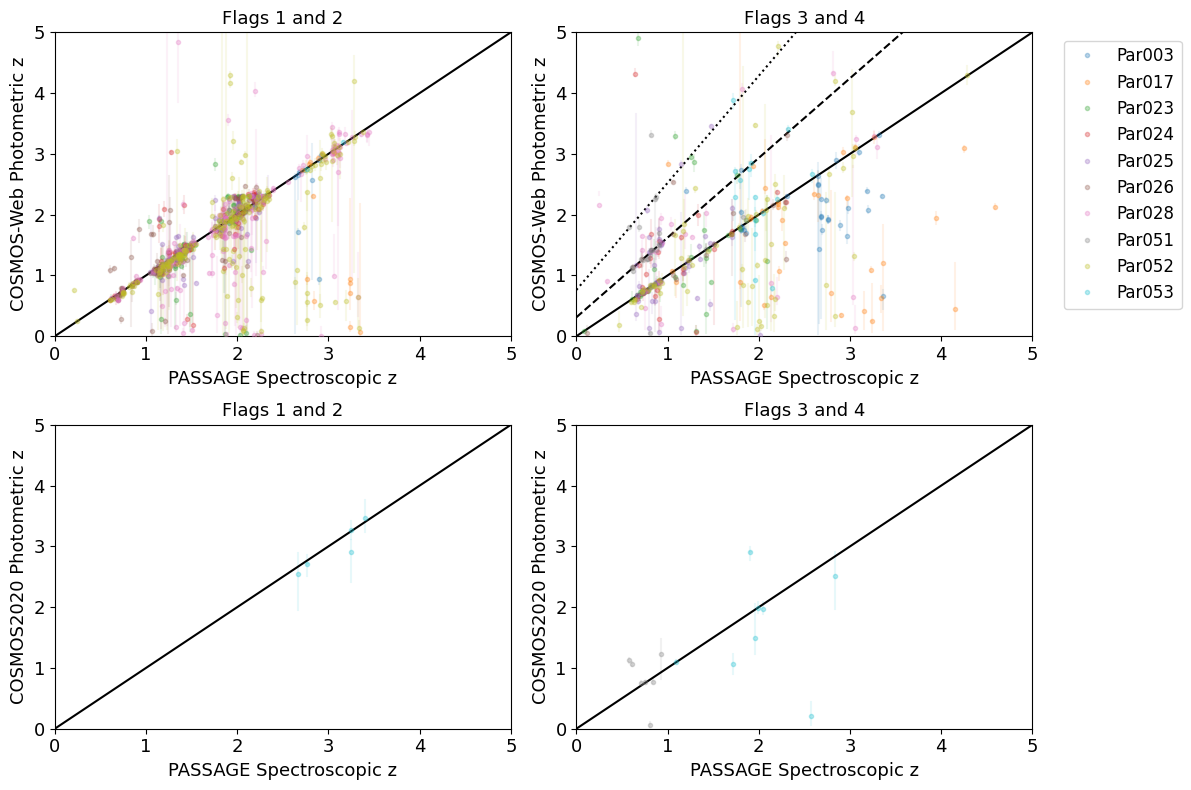

In [147]:
fig, ((ax1,ax2), (ax3,ax4)) = plt.subplots(2,2,figsize=(12,8))


zpas=np.where(df7['cosmosz']<0,-1,df7['redshift'])#df1['redshift']
zpaserr=np.where(df7['cosmosz']<0,-1,df7['redshift_error'])#df1['redshift']
zcos=np.where(df7['cosmosz']<0,-1,df7['cosmosz'])#df1['cosmosz']
zcoslow=np.where(df7['cosmosz']<0,-1,df7['cosmoszlow'])#df1['cosmosz']
zcosup=np.where(df7['cosmosz']<0,-1,df7['cosmoszup'])#df1['cosmosz']
zpas=np.where(df7['emline_flag']>2,-1,zpas)
ax1.plot(zpas,zcos,".",label='Par003',alpha=0.3,zorder=10,color='tab:blue')
ax1.plot([zpas,zpas],[zcoslow,zcosup],color='tab:blue',alpha=0.1)
ax1.plot([zpas-zpaserr,zpas+zpaserr],[zcos,zcos],color='tab:blue',alpha=0.1)
zpas=np.where(df7['cosmosz']<0,-1,df7['redshift'])#df1['redshift']
zpas=np.where((df7['emline_flag']>2)&(df7['emline_flag']<5),zpas,-1)
ax2.plot(zpas,zcos,".",label='Par003',alpha=0.3,zorder=10,color='tab:blue')
ax2.plot([zpas,zpas],[zcoslow,zcosup],color='tab:blue',alpha=0.1)
ax2.plot([zpas-zpaserr,zpas+zpaserr],[zcos,zcos],color='tab:blue',alpha=0.1)


zpas=np.where(df8['cosmosz']<0,-1,df8['redshift'])#df1['redshift']
zpaserr=np.where(df8['cosmosz']<0,-1,df8['redshift_error'])#df1['redshift']
zcos=np.where(df8['cosmosz']<0,-1,df8['cosmosz'])#df1['cosmosz']
zcoslow=np.where(df8['cosmosz']<0,-1,df8['cosmoszlow'])#df1['cosmosz']
zcosup=np.where(df8['cosmosz']<0,-1,df8['cosmoszup'])#df1['cosmosz']
zpas=np.where(df8['emline_flag']>2,-1,zpas)
ax1.plot(zpas,zcos,".",label='Par017',alpha=0.3,zorder=10,color='tab:orange')
ax1.plot([zpas,zpas],[zcoslow,zcosup],color='tab:orange',alpha=0.1)
ax1.plot([zpas-zpaserr,zpas+zpaserr],[zcos,zcos],color='tab:orange',alpha=0.1)
zpas=np.where(df8['cosmosz']<0,-1,df8['redshift'])#df1['redshift']
zpas=np.where((df8['emline_flag']>2)&(df8['emline_flag']<5),zpas,-1)
ax2.plot(zpas,zcos,".",label='Par017',alpha=0.3,zorder=10,color='tab:orange')
ax2.plot([zpas,zpas],[zcoslow,zcosup],color='tab:orange',alpha=0.1)
ax2.plot([zpas-zpaserr,zpas+zpaserr],[zcos,zcos],color='tab:orange',alpha=0.1)



zpas=np.where(df4['cosmosz']<0,-1,df4['redshift'])#df1['redshift']
zpaserr=np.where(df4['cosmosz']<0,-1,df4['redshift_error'])#df1['redshift']
zcos=np.where(df4['cosmosz']<0,-1,df4['cosmosz'])#df1['cosmosz']
zcoslow=np.where(df4['cosmosz']<0,-1,df4['cosmoszlow'])#df1['cosmosz']
zcosup=np.where(df4['cosmosz']<0,-1,df4['cosmoszup'])#df1['cosmosz']
zpas=np.where(df4['emline_flag']>2,-1,zpas)
ax1.plot(zpas,zcos,".",label='Par023',alpha=0.3,zorder=10,color='tab:green')
ax1.plot([zpas,zpas],[zcoslow,zcosup],color='tab:green',alpha=0.1)
ax1.plot([zpas-zpaserr,zpas+zpaserr],[zcos,zcos],color='tab:green',alpha=0.1)
zpas=np.where(df4['cosmosz']<0,-1,df4['redshift'])#df1['redshift']
zpas=np.where((df4['emline_flag']>2)&(df4['emline_flag']<5),zpas,-1)
ax2.plot(zpas,zcos,".",label='Par023',alpha=0.3,zorder=10,color='tab:green')
ax2.plot([zpas,zpas],[zcoslow,zcosup],color='tab:green',alpha=0.1)
ax2.plot([zpas-zpaserr,zpas+zpaserr],[zcos,zcos],color='tab:green',alpha=0.1)


zpas=np.where(df1['cosmosz']<0,-1,df1['redshift'])#df1['redshift']
zpaserr=np.where(df1['cosmosz']<0,-1,df1['redshift_error'])#df1['redshift']
zcos=np.where(df1['cosmosz']<0,-1,df1['cosmosz'])#df1['cosmosz']
zcoslow=np.where(df1['cosmosz']<0,-1,df1['cosmoszlow'])#df1['cosmosz']
zcosup=np.where(df1['cosmosz']<0,-1,df1['cosmoszup'])#df1['cosmosz']
zpas=np.where(df1['emline_flag']>2,-1,zpas)
ax1.plot(zpas,zcos,".",label='Par024',alpha=0.3,zorder=10,color='tab:red')
ax1.plot([zpas,zpas],[zcoslow,zcosup],color='tab:red',alpha=0.1)
ax1.plot([zpas-zpaserr,zpas+zpaserr],[zcos,zcos],color='tab:red',alpha=0.1)
zpas=np.where(df1['cosmosz']<0,-1,df1['redshift'])#df1['redshift']
zpas=np.where((df1['emline_flag']>2)&(df1['emline_flag']<5),zpas,-1)
ax2.plot(zpas,zcos,".",label='Par024',alpha=0.3,zorder=10,color='tab:red')
ax2.plot([zpas,zpas],[zcoslow,zcosup],color='tab:red',alpha=0.1)
ax2.plot([zpas-zpaserr,zpas+zpaserr],[zcos,zcos],color='tab:red',alpha=0.1)


zpas=np.where(df3['cosmosz']<0,-1,df3['redshift'])#df1['redshift']
zpaserr=np.where(df3['cosmosz']<0,-1,df3['redshift_error'])#df1['redshift']
zcos=np.where(df3['cosmosz']<0,-1,df3['cosmosz'])#df1['cosmosz']
zcoslow=np.where(df3['cosmosz']<0,-1,df3['cosmoszlow'])#df1['cosmosz']
zcosup=np.where(df3['cosmosz']<0,-1,df3['cosmoszup'])#df1['cosmosz']
zpas=np.where(df3['emline_flag']>2,-1,zpas)
ax1.plot(zpas,zcos,".",label='Par025',alpha=0.3,zorder=10,color='tab:purple')
ax1.plot([zpas,zpas],[zcoslow,zcosup],color='tab:purple',alpha=0.1)
ax1.plot([zpas-zpaserr,zpas+zpaserr],[zcos,zcos],color='tab:purple',alpha=0.1)
zpas=np.where(df3['cosmosz']<0,-1,df3['redshift'])#df1['redshift']
zpas=np.where((df3['emline_flag']>2)&(df3['emline_flag']<5),zpas,-1)
ax2.plot(zpas,zcos,".",label='Par025',alpha=0.3,zorder=10,color='tab:purple')
ax2.plot([zpas,zpas],[zcoslow,zcosup],color='tab:purple',alpha=0.1)
ax2.plot([zpas-zpaserr,zpas+zpaserr],[zcos,zcos],color='tab:purple',alpha=0.1)



zpas=np.where(df6['cosmosz']<0,-1,df6['redshift'])#df1['redshift']
zpaserr=np.where(df6['cosmosz']<0,-1,df6['redshift_error'])#df1['redshift']
zcos=np.where(df6['cosmosz']<0,-1,df6['cosmosz'])#df1['cosmosz']
zcoslow=np.where(df6['cosmosz']<0,-1,df6['cosmoszlow'])#df1['cosmosz']
zcosup=np.where(df6['cosmosz']<0,-1,df6['cosmoszup'])#df1['cosmosz']
zpas=np.where(df6['emline_flag']>2,-1,zpas)
ax1.plot(zpas,zcos,".",label='Par026',alpha=0.3,zorder=10,color='tab:brown')
ax1.plot([zpas,zpas],[zcoslow,zcosup],color='tab:brown',alpha=0.1)
ax1.plot([zpas-zpaserr,zpas+zpaserr],[zcos,zcos],color='tab:brown',alpha=0.1)
zpas=np.where(df6['cosmosz']<0,-1,df6['redshift'])#df1['redshift']
zpas=np.where((df6['emline_flag']>2)&(df6['emline_flag']<5),zpas,-1)
ax2.plot(zpas,zcos,".",label='Par026',alpha=0.3,zorder=10,color='tab:brown')
ax2.plot([zpas,zpas],[zcoslow,zcosup],color='tab:brown',alpha=0.1)
ax2.plot([zpas-zpaserr,zpas+zpaserr],[zcos,zcos],color='tab:brown',alpha=0.1)

zpas=np.where(df9['cosmosz']<0,-1,df9['redshift'])#df1['redshift']
zpaserr=np.where(df9['cosmosz']<0,-1,df9['redshift_error'])#df1['redshift']
zcos=np.where(df9['cosmosz']<0,-1,df9['cosmosz'])#df1['cosmosz']
zcoslow=np.where(df9['cosmosz']<0,-1,df9['cosmoszlow'])#df1['cosmosz']
zcosup=np.where(df9['cosmosz']<0,-1,df9['cosmoszup'])#df1['cosmosz']
zpas=np.where(df9['emline_flag']>2,-1,zpas)
ax1.plot(zpas,zcos,".",label='Par028',alpha=0.3,zorder=10,color='tab:pink')
ax1.plot([zpas,zpas],[zcoslow,zcosup],color='tab:pink',alpha=0.1)
ax1.plot([zpas-zpaserr,zpas+zpaserr],[zcos,zcos],color='tab:pink',alpha=0.1)
zpas=np.where(df9['cosmosz']<0,-1,df9['redshift'])#df1['redshift']
zpas=np.where((df9['emline_flag']>2)&(df9['emline_flag']<5),zpas,-1)
ax2.plot(zpas,zcos,".",label='Par028',alpha=0.3,zorder=10,color='tab:pink')
ax2.plot([zpas,zpas],[zcoslow,zcosup],color='tab:pink',alpha=0.1)
ax2.plot([zpas-zpaserr,zpas+zpaserr],[zcos,zcos],color='tab:pink',alpha=0.1)



zpas=np.where(df2['cosmosz']<0,-1,df2['redshift'])#df1['redshift']
zpaserr=np.where(df2['cosmosz']<0,-1,df2['redshift_error'])#df1['redshift']
zcos=np.where(df2['cosmosz']<0,-1,df2['cosmosz'])#df1['cosmosz']
zcoslow=np.where(df2['cosmosz']<0,-1,df2['cosmoszlow'])#df1['cosmosz']
zcosup=np.where(df2['cosmosz']<0,-1,df2['cosmoszup'])#df1['cosmosz']
zpas=np.where(df2['emline_flag']>2,-1,zpas)#df1['redshift']
ax1.plot(zpas,zcos,".",label='Par051',alpha=0.3,zorder=10,color='tab:gray')
ax1.plot([zpas,zpas],[zcoslow,zcosup],color='tab:gray',alpha=0.1)
ax1.plot([zpas-zpaserr,zpas+zpaserr],[zcos,zcos],color='tab:gray',alpha=0.1)
zpas=np.where(df2['cosmosz']<0,-1,df2['redshift'])#df1['redshift']
zpas=np.where((df2['emline_flag']>2)&(df2['emline_flag']<5),zpas,-1)
ax2.plot(zpas,zcos,".",label='Par051',alpha=0.3,zorder=10,color='tab:gray')
ax2.plot([zpas,zpas],[zcoslow,zcosup],color='tab:gray',alpha=0.1)
ax2.plot([zpas-zpaserr,zpas+zpaserr],[zcos,zcos],color='tab:gray',alpha=0.1)

zpas=np.where(df10['cosmosz']<0,-1,df10['redshift'])#df1['redshift']
zpaserr=np.where(df10['cosmosz']<0,-1,df10['redshift_error'])#df1['redshift']
zcos=np.where(df10['cosmosz']<0,-1,df10['cosmosz'])#df1['cosmosz']
zcoslow=np.where(df10['cosmosz']<0,-1,df10['cosmoszlow'])#df1['cosmosz']
zcosup=np.where(df10['cosmosz']<0,-1,df10['cosmoszup'])#df1['cosmosz']
zpas=np.where(df10['emline_flag']>2,-1,zpas)
ax1.plot(zpas,zcos,".",label='Par052',alpha=0.3,zorder=10,color='tab:olive')
ax1.plot([zpas,zpas],[zcoslow,zcosup],color='tab:olive',alpha=0.1)
ax1.plot([zpas-zpaserr,zpas+zpaserr],[zcos,zcos],color='tab:olive',alpha=0.1)
zpas=np.where(df10['cosmosz']<0,-1,df10['redshift'])#df1['redshift']
zpas=np.where((df10['emline_flag']>2)&(df10['emline_flag']<5),zpas,-1)
ax2.plot(zpas,zcos,".",label='Par052',alpha=0.3,zorder=10,color='tab:olive')
ax2.plot([zpas,zpas],[zcoslow,zcosup],color='tab:olive',alpha=0.1)
ax2.plot([zpas-zpaserr,zpas+zpaserr],[zcos,zcos],color='tab:olive',alpha=0.1)


zpas=np.where(df5['cosmosz']<0,-1,df5['redshift'])#df1['redshift']
zpaserr=np.where(df5['cosmosz']<0,-1,df5['redshift_error'])#df1['redshift']
zcos=np.where(df5['cosmosz']<0,-1,df5['cosmosz'])#df1['cosmosz']
zcoslow=np.where(df5['cosmosz']<0,-1,df5['cosmoszlow'])#df1['cosmosz']
zcosup=np.where(df5['cosmosz']<0,-1,df5['cosmoszup'])#df1['cosmosz']
zpas=np.where(df5['emline_flag']>2,-1,zpas)
ax1.plot(zpas,zcos,".",label='Par053',alpha=0.3,zorder=10,color='tab:cyan')
ax1.plot([zpas,zpas],[zcoslow,zcosup],color='tab:cyan',alpha=0.1)
ax1.plot([zpas-zpaserr,zpas+zpaserr],[zcos,zcos],color='tab:cyan',alpha=0.1)
zpas=np.where(df5['cosmosz']<0,-1,df5['redshift'])#df1['redshift']
zpas=np.where((df5['emline_flag']>2)&(df5['emline_flag']<5),zpas,-1)
ax2.plot(zpas,zcos,".",label='Par053',alpha=0.3,zorder=10,color='tab:cyan')
ax2.plot([zpas,zpas],[zcoslow,zcosup],color='tab:cyan',alpha=0.1)
ax2.plot([zpas-zpaserr,zpas+zpaserr],[zcos,zcos],color='tab:cyan',alpha=0.1)

zpas=np.where(df52['cosmos2020z']<0,-1,df52['redshift'])#df1['redshift']
zpas=np.where(np.isnan(df52['cosmos2020z'])==True,-1,zpas)#
zpaserr=np.where(df52['cosmos2020z']<0,-1,df52['redshift_error'])#df1['redshift']
zcos=np.where(df52['cosmos2020z']<0,-1,df52['cosmos2020z'])#df1['cosmosz']
zcoslow=np.where(df52['cosmos2020z']<0,-1,df52['cosmos2020zlow'])#df1['cosmosz']
zcosup=np.where(df52['cosmos2020z']<0,-1,df52['cosmos2020zup'])#df1['cosmosz']
zpas=np.where(df52['emline_flag']>2,-1,zpas)
ax3.plot(zpas,zcos,".",label='Par053',alpha=0.3,zorder=10,color='tab:cyan')
ax3.plot([zpas,zpas],[zcoslow,zcosup],color='tab:cyan',alpha=0.1)
ax3.plot([zpas-zpaserr,zpas+zpaserr],[zcos,zcos],color='tab:cyan',alpha=0.1)
zpas=np.where(df52['cosmos2020z']<0,-1,df52['redshift'])#df1['redshift']
zpas=np.where(np.isnan(df52['cosmos2020z'])==True,-1,zpas)#
zpas=np.where((df52['emline_flag']>2)&(df52['emline_flag']<5),zpas,-1)
ax4.plot(zpas,zcos,".",label='Par053',alpha=0.3,zorder=10,color='tab:cyan')
ax4.plot([zpas,zpas],[zcoslow,zcosup],color='tab:cyan',alpha=0.1)
ax4.plot([zpas-zpaserr,zpas+zpaserr],[zcos,zcos],color='tab:cyan',alpha=0.1)


zpas=np.where(df22['cosmos2020z']<0,-1,df22['redshift'])#df1['redshift']
zpas=np.where(np.isnan(df22['cosmos2020z'])==True,-1,zpas)#
zpaserr=np.where(df22['cosmos2020z']<0,-1,df22['redshift_error'])#df1['redshift']
zcos=np.where(df22['cosmos2020z']<0,-1,df22['cosmos2020z'])#df1['cosmosz']
zcoslow=np.where(df22['cosmos2020z']<0,-1,df22['cosmos2020zlow'])#df1['cosmosz']
zcosup=np.where(df22['cosmos2020z']<0,-1,df22['cosmos2020zup'])#df1['cosmosz']
zpas=np.where(df22['emline_flag']>2,-1,zpas)
ax3.plot(zpas,zcos,".",label='Par053',alpha=0.3,zorder=10,color='tab:gray')
ax3.plot([zpas,zpas],[zcoslow,zcosup],color='tab:gray',alpha=0.1)
ax3.plot([zpas-zpaserr,zpas+zpaserr],[zcos,zcos],color='tab:gray',alpha=0.1)
zpas=np.where(df22['cosmos2020z']<0,-1,df22['redshift'])#df1['redshift']
zpas=np.where(np.isnan(df22['cosmos2020z'])==True,-1,zpas)#
zpas=np.where((df22['emline_flag']>2)&(df22['emline_flag']<5),zpas,-1)
ax4.plot(zpas,zcos,".",label='Par053',alpha=0.3,zorder=10,color='tab:gray')
ax4.plot([zpas,zpas],[zcoslow,zcosup],color='tab:gray',alpha=0.1)
ax4.plot([zpas-zpaserr,zpas+zpaserr],[zcos,zcos],color='tab:gray',alpha=0.1)




ax1.set_xlim(0,5)
ax1.set_ylim(0,5)
ax1.plot([0,5],[0,5],"k")

ax2.set_xlim(0,5)
ax2.set_ylim(0,5)
ax2.plot([0,5],[0,5],"k")

ax3.set_xlim(0,5)
ax3.set_ylim(0,5)
ax3.plot([0,5],[0,5],"k")

ax4.set_xlim(0,5)
ax4.set_ylim(0,5)
ax4.plot([0,5],[0,5],"k")

x=np.linspace(0,5,20)
y=6565/5007*(1+x)-1
#ax1.plot(x,y,"k--")
ax2.plot(x,y,"k--")#this is for if cosmos is 5007 and we thought in passage is h alpha
#plt.fill_between(x, y-0.1, y+0.1,color='gray',alpha=0.4)


y=6565/3727*(1+x)-1
ax2.plot(x,y,"k:")#this is for if cosmos is oII and passage is h alpha
#plt.fill_between(x, y-0.1, y+0.1,color='gray',alpha=0.4)

x=np.linspace(0,5,20)
y=5007/6565*(1+x)-1
#plt.plot(x,y,"k--")#this is for if for cosmos thinks H alpha and we thought in passage is oIII

y=3727/6565*(1+x)-1
#plt.plot(x,y,"k:")#this is for if cosmos is oII and passage is h alpha

ax1.set_xlabel('PASSAGE Spectroscopic z', fontsize=13)
ax2.set_xlabel('PASSAGE Spectroscopic z', fontsize=13)
ax1.set_ylabel('COSMOS-Web Photometric z', fontsize=13)
ax2.set_ylabel('COSMOS-Web Photometric z', fontsize=13)
ax1.set_title('Flags 1 and 2', fontsize=13)
ax2.set_title('Flags 3 and 4', fontsize=13)


ax3.set_xlabel('PASSAGE Spectroscopic z', fontsize=13)
ax4.set_xlabel('PASSAGE Spectroscopic z', fontsize=13)
ax3.set_ylabel('COSMOS2020 Photometric z', fontsize=13)
ax4.set_ylabel('COSMOS2020 Photometric z', fontsize=13)
ax3.set_title('Flags 1 and 2', fontsize=13)
ax4.set_title('Flags 3 and 4', fontsize=13)

ax1.tick_params(axis='both', labelsize=13)
ax2.tick_params(axis='both', labelsize=13)
ax3.tick_params(axis='both', labelsize=13)
ax4.tick_params(axis='both', labelsize=13)
#ax1.xticks(fontsize=14) 
# Increase font size for y-axis tick labels
#ax1.set_yticks(fontsize=14)
ax2.legend(fontsize=12,loc='upper left', bbox_to_anchor=(1.05, 1))
plt.tight_layout()

In [236]:
df7

,objid,redshift,redshift_error,ra_obj,dec_obj,f140w_mag,a_image_obj,b_image_obj,snr_tot_others,chisq,...,snr_Pb,snr_SIII,emline_flag,cosmosra,cosmosdec,cosmosid,cosmosz,cosmoszmed,cosmoszlow,cosmoszup
0,43,2.97819,0.00262,150.410795,2.384626,24.94,6.593,3.767,5.83,-13.07,...,-1.0,-1.000000,3,150.410797,2.384621,511465.0,2.1090,2.1090,2.0293,2.2053
1,146,3.36305,0.00117,150.415518,2.387914,27.52,2.314,2.149,7.96,-17.63,...,-1.0,-1.000000,3,150.415515,2.387915,512161.0,0.6671,0.6671,0.4550,0.7600
2,277,1.80275,0.00026,150.399697,2.390531,22.84,6.662,5.986,38.17,-29.87,...,-1.0,-1.000000,4,150.399701,2.390527,511723.0,1.7478,1.7478,1.7053,1.8065
3,308,2.81944,0.00162,150.404507,2.391197,27.82,2.211,1.933,5.95,-14.43,...,-1.0,-1.000000,2,150.404510,2.391196,535413.0,2.5722,2.5722,0.9458,3.1571
4,541,2.66260,0.00000,150.410698,2.394876,24.29,7.571,5.762,4.13,-33.95,...,-1.0,-1.000000,2,150.410697,2.394875,512983.0,1.7071,1.7071,1.6834,1.7604
5,607,1.80108,0.00150,150.403083,2.395840,24.42,7.849,5.924,7.90,-17.08,...,-1.0,-1.000000,4,150.403080,2.395828,512676.0,2.0411,2.0411,1.9590,2.0849
6,692,2.88926,0.00163,150.407061,2.396807,24.16,6.518,4.320,12.02,-16.83,...,-1.0,-1.000000,3,150.407064,2.396805,513090.0,1.8238,1.8238,1.7543,1.8916
7,696,1.85883,0.00000,150.391651,2.396794,23.59,6.609,4.469,39.10,-24.91,...,-1.0,-1.000000,4,150.391654,2.396790,512217.0,1.6979,1.6979,1.6727,1.7909
8,703,1.81438,0.00080,150.411208,2.396906,24.78,4.683,3.805,9.02,-15.67,...,-1.0,-1.000000,4,150.411209,2.396903,513343.0,1.8011,1.8011,1.7537,1.8395
9,774,2.64611,0.00000,150.410257,2.397407,26.65,3.908,2.702,8.39,-18.15,...,-1.0,-1.000000,3,150.410263,2.397418,513377.0,2.4949,2.4949,0.0367,2.8434


In [ ]:
for iii in range(len(df)):
        if (np.array(df['snr_Ha'][iii])>2) and (df['snr_OIII'][iii]<=2) and (df['snr_SIII'][i]<=2) and (df['snr_Pb'][i]<=2) and (df['snr_Hb'][i]<=2) and (df['snr_OII'][i]<=2):


            

In [168]:
from itertools import chain

Par003 1 1 68
Par017 2 1 160
Par023 2 3 315
Par024 7 3 439
Par025 14 6 590
Par026 17 7 746
Par028 21 8 1013
Par049 22 8 1130
Par051 36 12 1200
Par052 38 13 1530
Par053 43 14 1610
Par053 44 14 1615
Par051 46 14 1620
Par049 47 14 1642
Par005 54 20 1678
Par006 59 21 1710


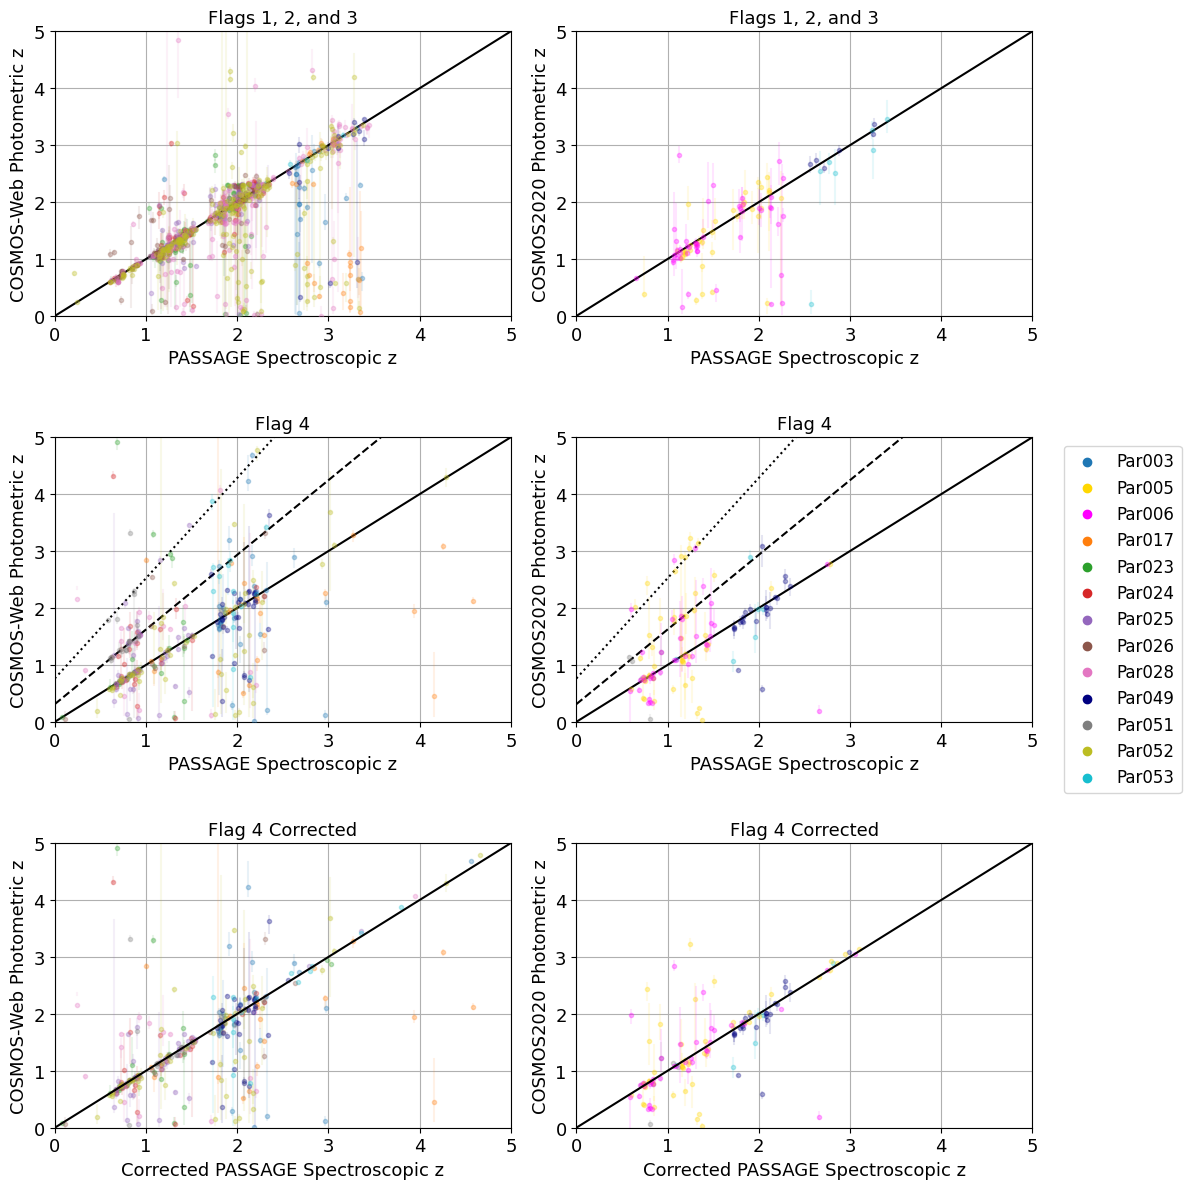

In [312]:
from itertools import chain
fig, ((ax1,ax3), (ax2,ax4), (ax5,ax6)) = plt.subplots(3,2,figsize=(12,12))

colors2=['tab:blue','gold','magenta','tab:orange','tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink','navy','tab:gray','tab:olive', 'tab:cyan']
labs=['Par003','Par005','Par006','Par017','Par023','Par024','Par025','Par026','Par028','Par049','Par051','Par052','Par053']
for i in range(len(colors2)):
    ax4.scatter([-1,-1],[-1,-1],color=colors2[i],label=labs[i],marker="o")
ax4.legend(fontsize=12,loc='upper left', bbox_to_anchor=(1.05, 1))

dzs=[]
dzs2=[]

dzsog=[]
dzsog2=[]

dzsogf4=[]
dzsogf4c=[]

good=0
bad=0
zx=[]
zy=[]


o2move=0
o3move=0
nomove=0

zpas=np.where(df7['cosmosz']<0,-1,df7['redshift'])#df1['redshift']
zpaserr=np.where(df7['cosmosz']<0,-1,df7['redshift_error'])#df1['redshift']
zcos=np.where(df7['cosmosz']<0,-1,df7['cosmosz'])#df1['cosmosz']
zcoslow=np.where(df7['cosmosz']<0,-1,df7['cosmoszlow'])#df1['cosmosz']
zcosup=np.where(df7['cosmosz']<0,-1,df7['cosmoszup'])#df1['cosmosz']
zpas=np.where(df7['emline_flag']>3,-1,zpas)
zpas=np.where(zpas==-1,np.nan,zpas)
dzs.append(list((zcos-zpas)/(1+zpas)))
dzsog.append(list((zcos-zpas)))
for qq in range(len(zcos)):
    if np.isnan(zpas[qq])==False:
        zx.append(zcos[qq])
        zy.append(zpas[qq])
ax1.plot(zpas,zcos,".",label='Par003',alpha=0.3,zorder=10,color='tab:blue')
ax1.plot([zpas,zpas],[zcoslow,zcosup],color='tab:blue',alpha=0.1)
ax1.plot([zpas-zpaserr,zpas+zpaserr],[zcos,zcos],color='tab:blue',alpha=0.1)
zpas=np.where(df7['cosmosz']<0,-1,df7['redshift'])#df1['redshift']
zpas=np.where((df7['emline_flag']>3)&(df7['emline_flag']<5),zpas,-1)
zpas=np.where(zpas==-1,np.nan,zpas)
dzsogf4.append(list((zcos-zpas)))
zpas=np.where(zpas==np.nan,-1,zpas)
ax2.plot(zpas,zcos,".",label='Par003',alpha=0.3,zorder=10,color='tab:blue')
ax2.plot([zpas,zpas],[zcoslow,zcosup],color='tab:blue',alpha=0.1)
ax2.plot([zpas-zpaserr,zpas+zpaserr],[zcos,zcos],color='tab:blue',alpha=0.1)
for i in range(len(zpas)):
    y5007=6565/5007*(1+zpas[i])-1
    y3727=6565/3727*(1+zpas[i])-1
    if (np.abs(y5007-zcos[i])<0.16) and (y5007!=-1):
        if (np.array(df7['snr_Ha'][i])>2) and (df7['snr_OIII'][i]<=2) and (df7['snr_SIII'][i]<=2) and (df7['snr_Pb'][i]<=2) and (df7['snr_Hb'][i]<=2) and (df7['snr_OII'][i]<=2):
            ax5.plot(y5007,zcos[i],".",color='tab:blue',alpha=0.3)
            o3move+=1
            dzsogf4c.append((y5007-zcos[i]))
        else:
            ax5.plot(zpas[i],zcos[i],".",color='tab:blue',alpha=0.3)
            ax5.plot([zpas[i],zpas[i]],[zcoslow[i],zcosup[i]],color='tab:blue',alpha=0.1)
            ax5.plot([zpas[i]-zpaserr[i],zpas[i]+zpaserr[i]],[zcos[i],zcos[i]],color='tab:blue',alpha=0.1)
            nomove+=1
            dzsogf4c.append((zpas[i]-zcos[i]))
    elif (np.abs(y3727-zcos[i])<0.16) and (y5007!=-1):
        if (np.array(df7['snr_Ha'][i])>2) and (df7['snr_OIII'][i]<=2) and (df7['snr_SIII'][i]<=2) and (df7['snr_Pb'][i]<=2) and (df7['snr_Hb'][i]<=2) and (df7['snr_OII'][i]<=2):
            ax5.plot(y3727,zcos[i],".",color='tab:blue',alpha=0.3)
            o2move+=1
            dzsogf4c.append((y3727-zcos[i]))
        else:
            ax5.plot(zpas[i],zcos[i],".",color='tab:blue',alpha=0.3)
            ax5.plot([zpas[i],zpas[i]],[zcoslow[i],zcosup[i]],color='tab:blue',alpha=0.1)
            ax5.plot([zpas[i]-zpaserr[i],zpas[i]+zpaserr[i]],[zcos[i],zcos[i]],color='tab:blue',alpha=0.1)
            nomove+=1
            dzsogf4c.append((zpas[i]-zcos[i]))
    elif y5007!=-1:  
            ax5.plot(zpas[i],zcos[i],".",color='tab:blue',alpha=0.3)
            ax5.plot([zpas[i],zpas[i]],[zcoslow[i],zcosup[i]],color='tab:blue',alpha=0.1)
            ax5.plot([zpas[i]-zpaserr[i],zpas[i]+zpaserr[i]],[zcos[i],zcos[i]],color='tab:blue',alpha=0.1)
            nomove+=1
            dzsogf4c.append((zpas[i]-zcos[i]))
    if abs(zpas[i]-zcos[i])<0.2 and (y5007!=-1):
            good+=1
    elif (y5007!=-1) and (np.isnan(y5007)==False):
            bad+=1
        
        
print('Par003', o3move,o2move,nomove)

zpas=np.where(df8['cosmosz']<0,-1,df8['redshift'])#df1['redshift']
zpaserr=np.where(df8['cosmosz']<0,-1,df8['redshift_error'])#df1['redshift']
zcos=np.where(df8['cosmosz']<0,-1,df8['cosmosz'])#df1['cosmosz']
zcoslow=np.where(df8['cosmosz']<0,-1,df8['cosmoszlow'])#df1['cosmosz']
zcosup=np.where(df8['cosmosz']<0,-1,df8['cosmoszup'])#df1['cosmosz']
zpas=np.where(df8['emline_flag']>3,-1,zpas)
zpas=np.where(zpas==-1,np.nan,zpas)
dzs.append(list((zcos-zpas)/(1+zpas)))
dzsog.append(list((zcos-zpas)))
for qq in range(len(zcos)):
    if np.isnan(zpas[qq])==False:
        zx.append(zcos[qq])
        zy.append(zpas[qq])
ax1.plot(zpas,zcos,".",label='Par017',alpha=0.3,zorder=10,color='tab:orange')
ax1.plot([zpas,zpas],[zcoslow,zcosup],color='tab:orange',alpha=0.1)
ax1.plot([zpas-zpaserr,zpas+zpaserr],[zcos,zcos],color='tab:orange',alpha=0.1)
zpas=np.where(df8['cosmosz']<0,-1,df8['redshift'])#df1['redshift']
zpas=np.where((df8['emline_flag']>3)&(df8['emline_flag']<5),zpas,-1)
zpas=np.where(zpas==-1,np.nan,zpas)
dzsogf4.append(list((zcos-zpas)))
zpas=np.where(zpas==np.nan,-1,zpas)
ax2.plot(zpas,zcos,".",label='Par017',alpha=0.3,zorder=10,color='tab:orange')
ax2.plot([zpas,zpas],[zcoslow,zcosup],color='tab:orange',alpha=0.1)
ax2.plot([zpas-zpaserr,zpas+zpaserr],[zcos,zcos],color='tab:orange',alpha=0.1)
for i in range(len(zpas)):
    y5007=6565/5007*(1+zpas[i])-1
    y3727=6565/3727*(1+zpas[i])-1
    if (np.abs(y5007-zcos[i])<0.16) and (y5007!=-1):
        if (np.array(df8['snr_Ha'][i])>2) and (df8['snr_OIII'][i]<=2) and (df8['snr_SIII'][i]<=2) and (df8['snr_Pb'][i]<=2) and (df8['snr_Hb'][i]<=2) and (df8['snr_OII'][i]<=2):
            ax5.plot(y5007,zcos[i],".",color='tab:orange',alpha=0.3)
            o3move+=1
            dzsogf4c.append((y5007-zcos[i]))
        else:
            ax5.plot(zpas[i],zcos[i],".",color='tab:orange',alpha=0.3)
            ax5.plot([zpas[i],zpas[i]],[zcoslow[i],zcosup[i]],color='tab:orange',alpha=0.1)
            ax5.plot([zpas[i]-zpaserr[i],zpas[i]+zpaserr[i]],[zcos[i],zcos[i]],color='tab:orange',alpha=0.1)
            nomove+=1
            dzsogf4c.append((zpas[i]-zcos[i]))
    elif (np.abs(y3727-zcos[i])<0.16) and (y5007!=-1):
        if (np.array(df8['snr_Ha'][i])>2) and (df8['snr_OIII'][i]<=2) and (df8['snr_SIII'][i]<=2) and (df8['snr_Pb'][i]<=2) and (df8['snr_Hb'][i]<=2) and (df8['snr_OII'][i]<=2):
            ax5.plot(y3727,zcos[i],".",color='tab:orange',alpha=0.3)
            o2move+=1
            dzsogf4c.append((y3727-zcos[i]))
        else:
            ax5.plot(zpas[i],zcos[i],".",color='tab:orange',alpha=0.3)
            ax5.plot([zpas[i],zpas[i]],[zcoslow[i],zcosup[i]],color='tab:orange',alpha=0.1)
            ax5.plot([zpas[i]-zpaserr[i],zpas[i]+zpaserr[i]],[zcos[i],zcos[i]],color='tab:orange',alpha=0.1)
            nomove+=1
            dzsogf4c.append((zpas[i]-zcos[i]))
    elif y5007!=-1:  
            ax5.plot(zpas[i],zcos[i],".",color='tab:orange',alpha=0.3)
            ax5.plot([zpas[i],zpas[i]],[zcoslow[i],zcosup[i]],color='tab:orange',alpha=0.1)
            ax5.plot([zpas[i]-zpaserr[i],zpas[i]+zpaserr[i]],[zcos[i],zcos[i]],color='tab:orange',alpha=0.1)
            nomove+=1
            dzsogf4c.append((zpas[i]-zcos[i]))
    if abs(zpas[i]-zcos[i])<0.2 and (y5007!=-1):
            good+=1
    elif (y5007!=-1) and (np.isnan(y5007)==False):
            bad+=1
print('Par017',o3move,o2move,nomove)

zpas=np.where(df4['cosmosz']<0,-1,df4['redshift'])#df1['redshift']
zpaserr=np.where(df4['cosmosz']<0,-1,df4['redshift_error'])#df1['redshift']
zcos=np.where(df4['cosmosz']<0,-1,df4['cosmosz'])#df1['cosmosz']
zcoslow=np.where(df4['cosmosz']<0,-1,df4['cosmoszlow'])#df1['cosmosz']
zcosup=np.where(df4['cosmosz']<0,-1,df4['cosmoszup'])#df1['cosmosz']
zpas=np.where(df4['emline_flag']>3,-1,zpas)
zpas=np.where(zpas==-1,np.nan,zpas)
dzs.append(list((zcos-zpas)/(1+zpas)))
dzsog.append(list((zcos-zpas)))
for qq in range(len(zcos)):
    if np.isnan(zpas[qq])==False:
        zx.append(zcos[qq])
        zy.append(zpas[qq])
ax1.plot(zpas,zcos,".",label='Par023',alpha=0.3,zorder=10,color='tab:green')
ax1.plot([zpas,zpas],[zcoslow,zcosup],color='tab:green',alpha=0.1)
ax1.plot([zpas-zpaserr,zpas+zpaserr],[zcos,zcos],color='tab:green',alpha=0.1)
zpas=np.where(df4['cosmosz']<0,-1,df4['redshift'])#df1['redshift']
zpas=np.where((df4['emline_flag']>3)&(df4['emline_flag']<5),zpas,-1)
zpas=np.where(zpas==-1,np.nan,zpas)
dzsogf4.append(list((zcos-zpas)))
zpas=np.where(zpas==np.nan,-1,zpas)
ax2.plot(zpas,zcos,".",label='Par023',alpha=0.3,zorder=10,color='tab:green')
ax2.plot([zpas,zpas],[zcoslow,zcosup],color='tab:green',alpha=0.1)
ax2.plot([zpas-zpaserr,zpas+zpaserr],[zcos,zcos],color='tab:green',alpha=0.1)
for i in range(len(zpas)):
    y5007=6565/5007*(1+zpas[i])-1
    y3727=6565/3727*(1+zpas[i])-1
    if (np.abs(y5007-zcos[i])<0.16) and (y5007!=-1):
        if (np.array(df4['snr_Ha'][i])>2) and (df4['snr_OIII'][i]<=2) and (df4['snr_SIII'][i]<=2) and (df4['snr_Pb'][i]<=2) and (df4['snr_Hb'][i]<=2) and (df4['snr_OII'][i]<=2):
            ax5.plot(y5007,zcos[i],".",color='tab:green',alpha=0.3)
            o3move+=1
            dzsogf4c.append((y5007-zcos[i]))
        else:
            x5.plot(zpas[i],zcos[i],".",color='tab:green',alpha=0.3)
            ax5.plot([zpas[i],zpas[i]],[zcoslow[i],zcosup[i]],color='tab:green',alpha=0.1)
            ax5.plot([zpas[i]-zpaserr[i],zpas[i]+zpaserr[i]],[zcos[i],zcos[i]],color='tab:green',alpha=0.1)
            nomove+=1
            dzsogf4c.append((zpas[i]-zcos[i]))
    elif (np.abs(y3727-zcos[i])<0.16) and (y5007!=-1):
        if (np.array(df4['snr_Ha'][i])>2) and (df4['snr_OIII'][i]<=2) and (df4['snr_SIII'][i]<=2) and (df4['snr_Pb'][i]<=2) and (df4['snr_Hb'][i]<=2) and (df4['snr_OII'][i]<=2):
            ax5.plot(y3727,zcos[i],".",color='tab:green',alpha=0.3)
            o2move+=1
            dzsogf4c.append((y3727-zcos[i]))
        else:
            x5.plot(zpas[i],zcos[i],".",color='tab:green',alpha=0.3)
            ax5.plot([zpas[i],zpas[i]],[zcoslow[i],zcosup[i]],color='tab:green',alpha=0.1)
            ax5.plot([zpas[i]-zpaserr[i],zpas[i]+zpaserr[i]],[zcos[i],zcos[i]],color='tab:green',alpha=0.1)
            nomove+=1
            dzsogf4c.append((zpas[i]-zcos[i]))
    elif y5007!=-1:  
            ax5.plot(zpas[i],zcos[i],".",color='tab:green',alpha=0.3)
            ax5.plot([zpas[i],zpas[i]],[zcoslow[i],zcosup[i]],color='tab:green',alpha=0.1)
            ax5.plot([zpas[i]-zpaserr[i],zpas[i]+zpaserr[i]],[zcos[i],zcos[i]],color='tab:green',alpha=0.1)
            nomove+=1
            dzsogf4c.append((zpas[i]-zcos[i]))
    if abs(zpas[i]-zcos[i])<0.2 and (y5007!=-1):
            good+=1
    elif (y5007!=-1) and (np.isnan(y5007)==False):
            bad+=1
print('Par023',o3move,o2move,nomove)

zpas=np.where(df1['cosmosz']<0,-1,df1['redshift'])#df1['redshift']
zpaserr=np.where(df1['cosmosz']<0,-1,df1['redshift_error'])#df1['redshift']
zcos=np.where(df1['cosmosz']<0,-1,df1['cosmosz'])#df1['cosmosz']
zcoslow=np.where(df1['cosmosz']<0,-1,df1['cosmoszlow'])#df1['cosmosz']
zcosup=np.where(df1['cosmosz']<0,-1,df1['cosmoszup'])#df1['cosmosz']
zpas=np.where(df1['emline_flag']>3,-1,zpas)
zpas=np.where(zpas==-1,np.nan,zpas)
dzs.append(list((zcos-zpas)/(1+zpas)))
dzsog.append(list((zcos-zpas)))
for qq in range(len(zcos)):
    if np.isnan(zpas[qq])==False:
        zx.append(zcos[qq])
        zy.append(zpas[qq])
ax1.plot(zpas,zcos,".",label='Par024',alpha=0.3,zorder=10,color='tab:red')
ax1.plot([zpas,zpas],[zcoslow,zcosup],color='tab:red',alpha=0.1)
ax1.plot([zpas-zpaserr,zpas+zpaserr],[zcos,zcos],color='tab:red',alpha=0.1)
zpas=np.where(df1['cosmosz']<0,-1,df1['redshift'])#df1['redshift']
zpas=np.where((df1['emline_flag']>3)&(df1['emline_flag']<5),zpas,-1)
zpas=np.where(zpas==-1,np.nan,zpas)
dzsogf4.append(list((zcos-zpas)))
zpas=np.where(zpas==np.nan,-1,zpas)
ax2.plot(zpas,zcos,".",label='Par024',alpha=0.3,zorder=10,color='tab:red')
ax2.plot([zpas,zpas],[zcoslow,zcosup],color='tab:red',alpha=0.1)
ax2.plot([zpas-zpaserr,zpas+zpaserr],[zcos,zcos],color='tab:red',alpha=0.1)
zpascorrected24=[]
for i in range(len(zpas)):
    y5007=6565/5007*(1+zpas[i])-1
    y3727=6565/3727*(1+zpas[i])-1
    if (np.abs(y5007-zcos[i])<0.16) and (y5007!=-1):
        if (np.array(df1['snr_Ha'][i])>2) and (df1['snr_OIII'][i]<=2) and (df1['snr_SIII'][i]<=2) and (df1['snr_Pb'][i]<=2) and (df1['snr_Hb'][i]<=2) and (df1['snr_OII'][i]<=2):
            ax5.plot(y5007,zcos[i],".",color='tab:red',alpha=0.3)
            o3move+=1
            dzsogf4c.append((y5007-zcos[i]))
            zpascorrected24.append(y5007)
        else:
            ax5.plot(zpas[i],zcos[i],".",color='tab:red',alpha=0.3)
            ax5.plot([zpas[i],zpas[i]],[zcoslow[i],zcosup[i]],color='tab:red',alpha=0.1)
            ax5.plot([zpas[i]-zpaserr[i],zpas[i]+zpaserr[i]],[zcos[i],zcos[i]],color='tab:red',alpha=0.1)
            nomove+=1
            dzsogf4c.append((zpas[i]-zcos[i]))
    elif (np.abs(y3727-zcos[i])<0.16) and (y5007!=-1):
        if (np.array(df1['snr_Ha'][i])>2) and (df1['snr_OIII'][i]<=2) and (df1['snr_SIII'][i]<=2) and (df1['snr_Pb'][i]<=2) and (df1['snr_Hb'][i]<=2) and (df1['snr_OII'][i]<=2):
            ax5.plot(y3727,zcos[i],".",color='tab:red',alpha=0.3)
            o2move+=1
            dzsogf4c.append((y3727-zcos[i]))
            zpascorrected24.append(y3727)
        else:
            ax5.plot(zpas[i],zcos[i],".",color='tab:red',alpha=0.3)
            ax5.plot([zpas[i],zpas[i]],[zcoslow[i],zcosup[i]],color='tab:red',alpha=0.1)
            ax5.plot([zpas[i]-zpaserr[i],zpas[i]+zpaserr[i]],[zcos[i],zcos[i]],color='tab:red',alpha=0.1)
            nomove+=1
            dzsogf4c.append((zpas[i]-zcos[i]))
    elif y5007!=-1:  
            ax5.plot(zpas[i],zcos[i],".",color='tab:red',alpha=0.3)
            ax5.plot([zpas[i],zpas[i]],[zcoslow[i],zcosup[i]],color='tab:red',alpha=0.1)
            ax5.plot([zpas[i]-zpaserr[i],zpas[i]+zpaserr[i]],[zcos[i],zcos[i]],color='tab:red',alpha=0.1)
            nomove+=1
            dzsogf4c.append((zpas[i]-zcos[i]))
            zpascorrected24.append(np.nan)
    else:
            zpascorrected24.append(np.nan)
    if abs(zpas[i]-zcos[i])<0.2 and (y5007!=-1):
            good+=1
    elif (y5007!=-1) and (np.isnan(y5007)==False):
            bad+=1
        
print('Par024',o3move,o2move,nomove)

zpas=np.where(df3['cosmosz']<0,-1,df3['redshift'])#df1['redshift']
zpaserr=np.where(df3['cosmosz']<0,-1,df3['redshift_error'])#df1['redshift']
zcos=np.where(df3['cosmosz']<0,-1,df3['cosmosz'])#df1['cosmosz']
zcoslow=np.where(df3['cosmosz']<0,-1,df3['cosmoszlow'])#df1['cosmosz']
zcosup=np.where(df3['cosmosz']<0,-1,df3['cosmoszup'])#df1['cosmosz']
zpas=np.where(df3['emline_flag']>3,-1,zpas)
zpas=np.where(zpas==-1,np.nan,zpas)
dzs.append(list((zcos-zpas)/(1+zpas)))
dzsog.append(list((zcos-zpas)))
for qq in range(len(zcos)):
    if np.isnan(zpas[qq])==False:
        zx.append(zcos[qq])
        zy.append(zpas[qq])
ax1.plot(zpas,zcos,".",label='Par025',alpha=0.3,zorder=10,color='tab:purple')
ax1.plot([zpas,zpas],[zcoslow,zcosup],color='tab:purple',alpha=0.1)
ax1.plot([zpas-zpaserr,zpas+zpaserr],[zcos,zcos],color='tab:purple',alpha=0.1)
zpas=np.where(df3['cosmosz']<0,-1,df3['redshift'])#df1['redshift']
zpas=np.where((df3['emline_flag']>3)&(df3['emline_flag']<5),zpas,-1)
zpas=np.where(zpas==-1,np.nan,zpas)
dzsogf4.append(list((zcos-zpas)))
zpas=np.where(zpas==np.nan,-1,zpas)
ax2.plot(zpas,zcos,".",label='Par025',alpha=0.3,zorder=10,color='tab:purple')
ax2.plot([zpas,zpas],[zcoslow,zcosup],color='tab:purple',alpha=0.1)
ax2.plot([zpas-zpaserr,zpas+zpaserr],[zcos,zcos],color='tab:purple',alpha=0.1)
for i in range(len(zpas)):
    y5007=6565/5007*(1+zpas[i])-1
    y3727=6565/3727*(1+zpas[i])-1
    if (np.abs(y5007-zcos[i])<0.16) and (y5007!=-1):
        if (np.array(df3['snr_Ha'][i])>2) and (df3['snr_OIII'][i]<=2) and (df3['snr_SIII'][i]<=2) and (df3['snr_Pb'][i]<=2) and (df3['snr_Hb'][i]<=2) and (df3['snr_OII'][i]<=2):
            ax5.plot(y5007,zcos[i],".",color='tab:purple',alpha=0.3)
            o3move+=1
            dzsogf4c.append((y5007-zcos[i]))
        else:
            ax5.plot(zpas[i],zcos[i],".",color='tab:purple',alpha=0.3)
            ax5.plot([zpas[i],zpas[i]],[zcoslow[i],zcosup[i]],color='tab:purple',alpha=0.1)
            ax5.plot([zpas[i]-zpaserr[i],zpas[i]+zpaserr[i]],[zcos[i],zcos[i]],color='tab:purple',alpha=0.1)
            nomove+=1
            dzsogf4c.append((zpas[i]-zcos[i]))
    elif (np.abs(y3727-zcos[i])<0.16) and (y5007!=-1):
        if (np.array(df3['snr_Ha'][i])>2) and (df3['snr_OIII'][i]<=2) and (df3['snr_SIII'][i]<=2) and (df3['snr_Pb'][i]<=2) and (df3['snr_Hb'][i]<=2) and (df3['snr_OII'][i]<=2):
            ax5.plot(y3727,zcos[i],".",color='tab:purple',alpha=0.3)
            o2move+=1
            dzsogf4c.append((y3727-zcos[i]))
        else:
            ax5.plot(zpas[i],zcos[i],".",color='tab:purple',alpha=0.3)
            ax5.plot([zpas[i],zpas[i]],[zcoslow[i],zcosup[i]],color='tab:purple',alpha=0.1)
            ax5.plot([zpas[i]-zpaserr[i],zpas[i]+zpaserr[i]],[zcos[i],zcos[i]],color='tab:purple',alpha=0.1)
            nomove+=1
            dzsogf4c.append((zpas[i]-zcos[i]))
    elif y5007!=-1:  
            ax5.plot(zpas[i],zcos[i],".",color='tab:purple',alpha=0.3)
            ax5.plot([zpas[i],zpas[i]],[zcoslow[i],zcosup[i]],color='tab:purple',alpha=0.1)
            ax5.plot([zpas[i]-zpaserr[i],zpas[i]+zpaserr[i]],[zcos[i],zcos[i]],color='tab:purple',alpha=0.1)
            nomove+=1
            dzsogf4c.append((zpas[i]-zcos[i]))
    if abs(zpas[i]-zcos[i])<0.2 and (y5007!=-1):
            good+=1
    elif (y5007!=-1) and (np.isnan(y5007)==False):
            bad+=1

print('Par025',o3move,o2move,nomove)

zpas=np.where(df6['cosmosz']<0,-1,df6['redshift'])#df1['redshift']
zpaserr=np.where(df6['cosmosz']<0,-1,df6['redshift_error'])#df1['redshift']
zcos=np.where(df6['cosmosz']<0,-1,df6['cosmosz'])#df1['cosmosz']
zcoslow=np.where(df6['cosmosz']<0,-1,df6['cosmoszlow'])#df1['cosmosz']
zcosup=np.where(df6['cosmosz']<0,-1,df6['cosmoszup'])#df1['cosmosz']
zpas=np.where(df6['emline_flag']>3,-1,zpas)
zpas=np.where(zpas==-1,np.nan,zpas)
dzs.append(list((zcos-zpas)/(1+zpas)))
dzsog.append(list((zcos-zpas)))
for qq in range(len(zcos)):
    if np.isnan(zpas[qq])==False:
        zx.append(zcos[qq])
        zy.append(zpas[qq])
ax1.plot(zpas,zcos,".",label='Par026',alpha=0.3,zorder=10,color='tab:brown')
ax1.plot([zpas,zpas],[zcoslow,zcosup],color='tab:brown',alpha=0.1)
ax1.plot([zpas-zpaserr,zpas+zpaserr],[zcos,zcos],color='tab:brown',alpha=0.1)
zpas=np.where(df6['cosmosz']<0,-1,df6['redshift'])#df1['redshift']
zpas=np.where((df6['emline_flag']>3)&(df6['emline_flag']<5),zpas,-1)
zpas=np.where(zpas==-1,np.nan,zpas)
dzsogf4.append(list((zcos-zpas)))
zpas=np.where(zpas==np.nan,-1,zpas)
ax2.plot(zpas,zcos,".",label='Par026',alpha=0.3,zorder=10,color='tab:brown')
ax2.plot([zpas,zpas],[zcoslow,zcosup],color='tab:brown',alpha=0.1)
ax2.plot([zpas-zpaserr,zpas+zpaserr],[zcos,zcos],color='tab:brown',alpha=0.1)
for i in range(len(zpas)):
    y5007=6565/5007*(1+zpas[i])-1
    y3727=6565/3727*(1+zpas[i])-1
    if (np.abs(y5007-zcos[i])<0.16) and (y5007!=-1):
        if (np.array(df6['snr_Ha'][i])>2) and (df6['snr_OIII'][i]<=2) and (df6['snr_SIII'][i]<=2) and (df6['snr_Pb'][i]<=2) and (df6['snr_Hb'][i]<=2) and (df6['snr_OII'][i]<=2):
            ax5.plot(y5007,zcos[i],".",color='tab:brown',alpha=0.3)
            o3move+=1
            dzsogf4c.append((y5007-zcos[i]))
        else:
            ax5.plot(zpas[i],zcos[i],".",color='tab:brown',alpha=0.3)
            ax5.plot([zpas[i],zpas[i]],[zcoslow[i],zcosup[i]],color='tab:brown',alpha=0.1)
            ax5.plot([zpas[i]-zpaserr[i],zpas[i]+zpaserr[i]],[zcos[i],zcos[i]],color='tab:brown',alpha=0.1)
            nomove+=1
            dzsogf4c.append((zpas[i]-zcos[i]))
    elif (np.abs(y3727-zcos[i])<0.16) and (y5007!=-1):
        if (np.array(df6['snr_Ha'][i])>2) and (df6['snr_OIII'][i]<=2) and (df6['snr_SIII'][i]<=2) and (df6['snr_Pb'][i]<=2) and (df6['snr_Hb'][i]<=2) and (df6['snr_OII'][i]<=2):
            ax5.plot(y3727,zcos[i],".",color='tab:brown',alpha=0.3)
            o2move+=1
            dzsogf4c.append((y3727-zcos[i]))
        else:
            ax5.plot(zpas[i],zcos[i],".",color='tab:brown',alpha=0.3)
            ax5.plot([zpas[i],zpas[i]],[zcoslow[i],zcosup[i]],color='tab:brown',alpha=0.1)
            ax5.plot([zpas[i]-zpaserr[i],zpas[i]+zpaserr[i]],[zcos[i],zcos[i]],color='tab:brown',alpha=0.1)
            nomove+=1
            dzsogf4c.append((zpas[i]-zcos[i]))
    elif y5007!=-1:  
            ax5.plot(zpas[i],zcos[i],".",color='tab:brown',alpha=0.3)
            ax5.plot([zpas[i],zpas[i]],[zcoslow[i],zcosup[i]],color='tab:brown',alpha=0.1)
            ax5.plot([zpas[i]-zpaserr[i],zpas[i]+zpaserr[i]],[zcos[i],zcos[i]],color='tab:brown',alpha=0.1)
            nomove+=1
            dzsogf4c.append((zpas[i]-zcos[i]))
    if abs(zpas[i]-zcos[i])<0.2 and (y5007!=-1):
            good+=1
    elif (y5007!=-1) and (np.isnan(y5007)==False):
            bad+=1

print('Par026',o3move,o2move,nomove)

zpas=np.where(df9['cosmosz']<0,-1,df9['redshift'])#df1['redshift']
zpaserr=np.where(df9['cosmosz']<0,-1,df9['redshift_error'])#df1['redshift']
zcos=np.where(df9['cosmosz']<0,-1,df9['cosmosz'])#df1['cosmosz']
zcoslow=np.where(df9['cosmosz']<0,-1,df9['cosmoszlow'])#df1['cosmosz']
zcosup=np.where(df9['cosmosz']<0,-1,df9['cosmoszup'])#df1['cosmosz']
zpas=np.where(df9['emline_flag']>3,-1,zpas)
zpas=np.where(zpas==-1,np.nan,zpas)
dzs.append(list((zcos-zpas)/(1+zpas)))
dzsog.append(list((zcos-zpas)))
for qq in range(len(zcos)):
    if np.isnan(zpas[qq])==False:
        zx.append(zcos[qq])
        zy.append(zpas[qq])
ax1.plot(zpas,zcos,".",label='Par028',alpha=0.3,zorder=10,color='tab:pink')
ax1.plot([zpas,zpas],[zcoslow,zcosup],color='tab:pink',alpha=0.1)
ax1.plot([zpas-zpaserr,zpas+zpaserr],[zcos,zcos],color='tab:pink',alpha=0.1)
zpas=np.where(df9['cosmosz']<0,-1,df9['redshift'])#df1['redshift']
zpas=np.where((df9['emline_flag']>3)&(df9['emline_flag']<5),zpas,-1)
zpas=np.where(zpas==-1,np.nan,zpas)
dzsogf4.append(list((zcos-zpas)))
zpas=np.where(zpas==np.nan,-1,zpas)
ax2.plot(zpas,zcos,".",label='Par028',alpha=0.3,zorder=10,color='tab:pink')
ax2.plot([zpas,zpas],[zcoslow,zcosup],color='tab:pink',alpha=0.1)
ax2.plot([zpas-zpaserr,zpas+zpaserr],[zcos,zcos],color='tab:pink',alpha=0.1)
for i in range(len(zpas)):
    y5007=6565/5007*(1+zpas[i])-1
    y3727=6565/3727*(1+zpas[i])-1
    if (np.abs(y5007-zcos[i])<0.16) and (y5007!=-1):
        if (np.array(df9['snr_Ha'][i])>2) and (df9['snr_OIII'][i]<=2) and (df9['snr_SIII'][i]<=2) and (df9['snr_Pb'][i]<=2) and (df9['snr_Hb'][i]<=2) and (df9['snr_OII'][i]<=2):
            ax5.plot(y5007,zcos[i],".",color='tab:pink',alpha=0.3)
            o3move+=1
            dzsogf4c.append((y5007-zcos[i]))
        else:
            ax5.plot(zpas[i],zcos[i],".",color='tab:pink',alpha=0.3)
            ax5.plot([zpas[i],zpas[i]],[zcoslow[i],zcosup[i]],color='tab:pink',alpha=0.1)
            ax5.plot([zpas[i]-zpaserr[i],zpas[i]+zpaserr[i]],[zcos[i],zcos[i]],color='tab:pink',alpha=0.1)
            nomove+=1
            dzsogf4c.append((zpas[i]-zcos[i]))
    elif (np.abs(y3727-zcos[i])<0.16) and (y5007!=-1):
        if (np.array(df9['snr_Ha'][i])>2) and (df9['snr_OIII'][i]<=2) and (df9['snr_SIII'][i]<=2) and (df9['snr_Pb'][i]<=2) and (df9['snr_Hb'][i]<=2) and (df9['snr_OII'][i]<=2):
            ax5.plot(y3727,zcos[i],".",color='tab:pink',alpha=0.3)
            o2move+=1
            dzsogf4c.append((y3727-zcos[i]))
        else:
            ax5.plot(zpas[i],zcos[i],".",color='tab:pink',alpha=0.3)
            ax5.plot([zpas[i],zpas[i]],[zcoslow[i],zcosup[i]],color='tab:pink',alpha=0.1)
            ax5.plot([zpas[i]-zpaserr[i],zpas[i]+zpaserr[i]],[zcos[i],zcos[i]],color='tab:pink',alpha=0.1)
            nomove+=1
            dzsogf4c.append((zpas[i]-zcos[i]))
    elif y5007!=-1:     
            ax5.plot(zpas[i],zcos[i],".",color='tab:pink',alpha=0.3)
            ax5.plot([zpas[i],zpas[i]],[zcoslow[i],zcosup[i]],color='tab:pink',alpha=0.1)
            ax5.plot([zpas[i]-zpaserr[i],zpas[i]+zpaserr[i]],[zcos[i],zcos[i]],color='tab:pink',alpha=0.1)
            nomove+=1
            dzsogf4c.append((zpas[i]-zcos[i]))
    if abs(zpas[i]-zcos[i])<0.2 and (y5007!=-1):
            good+=1
    elif (y5007!=-1) and (np.isnan(y5007)==False):
            bad+=1

print('Par028',o3move,o2move,nomove)

zpas=np.where(df15['cosmosz']<0,-1,df15['redshift'])#df1['redshift']
zpaserr=np.where(df15['cosmosz']<0,-1,df15['redshift_error'])#df1['redshift']
zcos=np.where(df15['cosmosz']<0,-1,df15['cosmosz'])#df1['cosmosz']
zcoslow=np.where(df15['cosmosz']<0,-1,df15['cosmoszlow'])#df1['cosmosz']
zcosup=np.where(df15['cosmosz']<0,-1,df15['cosmoszup'])#df1['cosmosz']
zpas=np.where(df15['emline_flag']>3,-1,zpas)#df1['redshift']
zpas=np.where(zpas==-1,np.nan,zpas)
dzs.append(list((zcos-zpas)/(1+zpas)))
dzsog.append(list((zcos-zpas)))
for qq in range(len(zcos)):
    if np.isnan(zpas[qq])==False:
        zx.append(zcos[qq])
        zy.append(zpas[qq])
ax1.plot(zpas,zcos,".",label='Par049',alpha=0.3,zorder=10,color='navy')
ax1.plot([zpas,zpas],[zcoslow,zcosup],color='navy',alpha=0.1)
ax1.plot([zpas-zpaserr,zpas+zpaserr],[zcos,zcos],color='navy',alpha=0.1)
zpas=np.where(df15['cosmosz']<0,-1,df15['redshift'])#df1['redshift']
zpas=np.where((df15['emline_flag']>3)&(df15['emline_flag']<5),zpas,-1)
zpas=np.where(zpas==-1,np.nan,zpas)
dzsogf4.append(list((zcos-zpas)))
zpas=np.where(zpas==np.nan,-1,zpas)
ax2.plot(zpas,zcos,".",label='Par049',alpha=0.3,zorder=10,color='navy')
ax2.plot([zpas,zpas],[zcoslow,zcosup],color='navy',alpha=0.1)
ax2.plot([zpas-zpaserr,zpas+zpaserr],[zcos,zcos],color='navy',alpha=0.1)
for i in range(len(zpas)):
    y5007=6565/5007*(1+zpas[i])-1
    y3727=6565/3727*(1+zpas[i])-1
    if (np.abs(y5007-zcos[i])<0.16) and (y5007!=-1):
        if (np.array(df15['snr_Ha'][i])>2) and (df15['snr_OIII'][i]<=2) and (df15['snr_SIII'][i]<=2) and (df15['snr_Pb'][i]<=2) and (df15['snr_Hb'][i]<=2) and (df15['snr_OII'][i]<=2):
            ax5.plot(y5007,zcos[i],".",color='navy',alpha=0.3)
            o3move+=1
            dzsogf4c.append((y5007-zcos[i]))
        else:
            ax5.plot(zpas[i],zcos[i],".",color='navy',alpha=0.3)
            ax5.plot([zpas[i],zpas[i]],[zcoslow[i],zcosup[i]],color='navy',alpha=0.1)
            ax5.plot([zpas[i]-zpaserr[i],zpas[i]+zpaserr[i]],[zcos[i],zcos[i]],color='navy',alpha=0.1)
            nomove+=1
            dzsogf4c.append((zpas[i]-zcos[i]))
    elif (np.abs(y3727-zcos[i])<0.16) and (y5007!=-1):
        if (np.array(df15['snr_Ha'][i])>2) and (df15['snr_OIII'][i]<=2) and (df15['snr_SIII'][i]<=2) and (df15['snr_Pb'][i]<=2) and (df15['snr_Hb'][i]<=2) and (df15['snr_OII'][i]<=2):
            ax5.plot(y3727,zcos[i],".",color='navy',alpha=0.3)
            o2move+=1
            dzsogf4c.append((y3727-zcos[i]))
        else:
            ax5.plot(zpas[i],zcos[i],".",color='navy',alpha=0.3)
            ax5.plot([zpas[i],zpas[i]],[zcoslow[i],zcosup[i]],color='navy',alpha=0.1)
            ax5.plot([zpas[i]-zpaserr[i],zpas[i]+zpaserr[i]],[zcos[i],zcos[i]],color='navy',alpha=0.1)
            nomove+=1
            dzsogf4c.append((zpas[i]-zcos[i]))
    elif y5007!=-1:    
            ax5.plot(zpas[i],zcos[i],".",color='navy',alpha=0.3)
            ax5.plot([zpas[i],zpas[i]],[zcoslow[i],zcosup[i]],color='navy',alpha=0.1)
            ax5.plot([zpas[i]-zpaserr[i],zpas[i]+zpaserr[i]],[zcos[i],zcos[i]],color='navy',alpha=0.1)
            nomove+=1
            dzsogf4c.append((zpas[i]-zcos[i]))
    if abs(zpas[i]-zcos[i])<0.2 and (y5007!=-1):
            good+=1
    elif (y5007!=-1) and (np.isnan(y5007)==False):
            bad+=1

print('Par049',o3move,o2move,nomove)

zpas=np.where(df2['cosmosz']<0,-1,df2['redshift'])#df1['redshift']
zpaserr=np.where(df2['cosmosz']<0,-1,df2['redshift_error'])#df1['redshift']
zcos=np.where(df2['cosmosz']<0,-1,df2['cosmosz'])#df1['cosmosz']
zcoslow=np.where(df2['cosmosz']<0,-1,df2['cosmoszlow'])#df1['cosmosz']
zcosup=np.where(df2['cosmosz']<0,-1,df2['cosmoszup'])#df1['cosmosz']
zpas=np.where(df2['emline_flag']>3,-1,zpas)#df1['redshift']
zpas=np.where(zpas==-1,np.nan,zpas)
dzs.append(list((zcos-zpas)/(1+zpas)))
dzsog.append(list((zcos-zpas)))
for qq in range(len(zcos)):
    if np.isnan(zpas[qq])==False:
        zx.append(zcos[qq])
        zy.append(zpas[qq])
ax1.plot(zpas,zcos,".",label='Par051',alpha=0.3,zorder=10,color='tab:gray')
ax1.plot([zpas,zpas],[zcoslow,zcosup],color='tab:gray',alpha=0.1)
ax1.plot([zpas-zpaserr,zpas+zpaserr],[zcos,zcos],color='tab:gray',alpha=0.1)
zpas=np.where(df2['cosmosz']<0,-1,df2['redshift'])#df1['redshift']
zpas=np.where((df2['emline_flag']>3)&(df2['emline_flag']<5),zpas,-1)
zpas=np.where(zpas==-1,np.nan,zpas)
dzsogf4.append(list((zcos-zpas)))
zpas=np.where(zpas==np.nan,-1,zpas)
ax2.plot(zpas,zcos,".",label='Par051',alpha=0.3,zorder=10,color='tab:gray')
ax2.plot([zpas,zpas],[zcoslow,zcosup],color='tab:gray',alpha=0.1)
ax2.plot([zpas-zpaserr,zpas+zpaserr],[zcos,zcos],color='tab:gray',alpha=0.1)
for i in range(len(zpas)):
    y5007=6565/5007*(1+zpas[i])-1
    y3727=6565/3727*(1+zpas[i])-1
    if (np.abs(y5007-zcos[i])<0.16) and (y5007!=-1):
        if (np.array(df2['snr_Ha'][i])>2) and (df2['snr_OIII'][i]<=2) and (df2['snr_SIII'][i]<=2) and (df2['snr_Pb'][i]<=2) and (df2['snr_Hb'][i]<=2) and (df2['snr_OII'][i]<=2):
            ax5.plot(y5007,zcos[i],".",color='tab:gray',alpha=0.3)
            o3move+=1
            dzsogf4c.append((y5007-zcos[i]))
        else:
            ax5.plot(zpas[i],zcos[i],".",color='tab:gray',alpha=0.3)
            ax5.plot([zpas[i],zpas[i]],[zcoslow[i],zcosup[i]],color='tab:gray',alpha=0.1)
            ax5.plot([zpas[i]-zpaserr[i],zpas[i]+zpaserr[i]],[zcos[i],zcos[i]],color='tab:gray',alpha=0.1)
            nomove+=1
            dzsogf4c.append((zpas[i]-zcos[i]))
    elif (np.abs(y3727-zcos[i])<0.16) and (y5007!=-1):
        if (np.array(df2['snr_Ha'][i])>2) and (df2['snr_OIII'][i]<=2) and (df2['snr_SIII'][i]<=2) and (df2['snr_Pb'][i]<=2) and (df2['snr_Hb'][i]<=2) and (df2['snr_OII'][i]<=2):
            ax5.plot(y3727,zcos[i],".",color='tab:gray',alpha=0.3)
            o2move+=1
            dzsogf4c.append((y3727-zcos[i]))
        else:
            ax5.plot(zpas[i],zcos[i],".",color='tab:gray',alpha=0.3)
            ax5.plot([zpas[i],zpas[i]],[zcoslow[i],zcosup[i]],color='tab:gray',alpha=0.1)
            ax5.plot([zpas[i]-zpaserr[i],zpas[i]+zpaserr[i]],[zcos[i],zcos[i]],color='tab:gray',alpha=0.1)
            nomove+=1
            dzsogf4c.append((zpas[i]-zcos[i]))
    elif y5007!=-1:    
            ax5.plot(zpas[i],zcos[i],".",color='tab:gray',alpha=0.3)
            ax5.plot([zpas[i],zpas[i]],[zcoslow[i],zcosup[i]],color='tab:gray',alpha=0.1)
            ax5.plot([zpas[i]-zpaserr[i],zpas[i]+zpaserr[i]],[zcos[i],zcos[i]],color='tab:gray',alpha=0.1)
            nomove+=1
            dzsogf4c.append((zpas[i]-zcos[i]))
    if abs(zpas[i]-zcos[i])<0.2 and (y5007!=-1):
            good+=1
    elif (y5007!=-1) and (np.isnan(y5007)==False):
            bad+=1

print('Par051',o3move,o2move,nomove)

zpas=np.where(df10['cosmosz']<0,-1,df10['redshift'])#df1['redshift']
zpaserr=np.where(df10['cosmosz']<0,-1,df10['redshift_error'])#df1['redshift']
zcos=np.where(df10['cosmosz']<0,-1,df10['cosmosz'])#df1['cosmosz']
zcoslow=np.where(df10['cosmosz']<0,-1,df10['cosmoszlow'])#df1['cosmosz']
zcosup=np.where(df10['cosmosz']<0,-1,df10['cosmoszup'])#df1['cosmosz']
zpas=np.where(df10['emline_flag']>3,-1,zpas)
zpas=np.where(zpas==-1,np.nan,zpas)
dzs.append(list((zcos-zpas)/(1+zpas)))
dzsog.append(list((zcos-zpas)))
for qq in range(len(zcos)):
    if np.isnan(zpas[qq])==False:
        zx.append(zcos[qq])
        zy.append(zpas[qq])
ax1.plot(zpas,zcos,".",label='Par052',alpha=0.3,zorder=10,color='tab:olive')
ax1.plot([zpas,zpas],[zcoslow,zcosup],color='tab:olive',alpha=0.1)
ax1.plot([zpas-zpaserr,zpas+zpaserr],[zcos,zcos],color='tab:olive',alpha=0.1)
zpas=np.where(df10['cosmosz']<0,-1,df10['redshift'])#df1['redshift']
zpas=np.where((df10['emline_flag']>3)&(df10['emline_flag']<5),zpas,-1)
zpas=np.where(zpas==-1,np.nan,zpas)
dzsogf4.append(list((zcos-zpas)))
zpas=np.where(zpas==np.nan,-1,zpas)
ax2.plot(zpas,zcos,".",label='Par052',alpha=0.3,zorder=10,color='tab:olive')
ax2.plot([zpas,zpas],[zcoslow,zcosup],color='tab:olive',alpha=0.1)
ax2.plot([zpas-zpaserr,zpas+zpaserr],[zcos,zcos],color='tab:olive',alpha=0.1)
for i in range(len(zpas)):
    y5007=6565/5007*(1+zpas[i])-1
    y3727=6565/3727*(1+zpas[i])-1
    if (np.abs(y5007-zcos[i])<0.16) and (y5007!=-1):
        if (np.array(df10['snr_Ha'][i])>2) and (df10['snr_OIII'][i]<=2) and (df10['snr_SIII'][i]<=2) and (df10['snr_Pb'][i]<=2) and (df10['snr_Hb'][i]<=2) and (df10['snr_OII'][i]<=2):
            ax5.plot(y5007,zcos[i],".",color='tab:olive',alpha=0.3)
            o3move+=1
            dzsogf4c.append((y5007-zcos[i]))
        else:
            ax5.plot(zpas[i],zcos[i],".",color='tab:olive',alpha=0.3)
            ax5.plot([zpas[i],zpas[i]],[zcoslow[i],zcosup[i]],color='tab:olive',alpha=0.1)
            ax5.plot([zpas[i]-zpaserr[i],zpas[i]+zpaserr[i]],[zcos[i],zcos[i]],color='tab:olive',alpha=0.1)
            nomove+=1
            dzsogf4c.append((zpas[i]-zcos[i]))
    elif (np.abs(y3727-zcos[i])<0.16) and (y5007!=-1):
        if (np.array(df10['snr_Ha'][i])>2) and (df10['snr_OIII'][i]<=2) and (df10['snr_SIII'][i]<=2) and (df10['snr_Pb'][i]<=2) and (df10['snr_Hb'][i]<=2) and (df10['snr_OII'][i]<=2):
            ax5.plot(y3727,zcos[i],".",color='tab:olive',alpha=0.3)
            o2move+=1
            dzsogf4c.append((y3727-zcos[i]))
        else:
            ax5.plot(zpas[i],zcos[i],".",color='tab:olive',alpha=0.3)
            ax5.plot([zpas[i],zpas[i]],[zcoslow[i],zcosup[i]],color='tab:olive',alpha=0.1)
            ax5.plot([zpas[i]-zpaserr[i],zpas[i]+zpaserr[i]],[zcos[i],zcos[i]],color='tab:olive',alpha=0.1)
            nomove+=1
            dzsogf4c.append((zpas[i]-zcos[i]))
    elif y5007!=-1:    
            ax5.plot(zpas[i],zcos[i],".",color='tab:olive',alpha=0.3)
            ax5.plot([zpas[i],zpas[i]],[zcoslow[i],zcosup[i]],color='tab:olive',alpha=0.1)
            ax5.plot([zpas[i]-zpaserr[i],zpas[i]+zpaserr[i]],[zcos[i],zcos[i]],color='tab:olive',alpha=0.1)
            nomove+=1
            dzsogf4c.append((zpas[i]-zcos[i]))
    if abs(zpas[i]-zcos[i])<0.2 and (y5007!=-1):
            good+=1
    elif (y5007!=-1) and (np.isnan(y5007)==False):
            bad+=1

print('Par052',o3move,o2move,nomove)

zpas=np.where(df5['cosmosz']<0,-1,df5['redshift'])#df1['redshift']
zpaserr=np.where(df5['cosmosz']<0,-1,df5['redshift_error'])#df1['redshift']
zcos=np.where(df5['cosmosz']<0,-1,df5['cosmosz'])#df1['cosmosz']
zcoslow=np.where(df5['cosmosz']<0,-1,df5['cosmoszlow'])#df1['cosmosz']
zcosup=np.where(df5['cosmosz']<0,-1,df5['cosmoszup'])#df1['cosmosz']
zpas=np.where(df5['emline_flag']>3,-1,zpas)
zpas=np.where(zpas==-1,np.nan,zpas)
dzs.append(list((zcos-zpas)/(1+zpas)))
dzsog.append(list((zcos-zpas)))
for qq in range(len(zcos)):
    if np.isnan(zpas[qq])==False:
        zx.append(zcos[qq])
        zy.append(zpas[qq])
ax1.plot(zpas,zcos,".",label='Par053',alpha=0.3,zorder=10,color='tab:cyan')
ax1.plot([zpas,zpas],[zcoslow,zcosup],color='tab:cyan',alpha=0.1)
ax1.plot([zpas-zpaserr,zpas+zpaserr],[zcos,zcos],color='tab:cyan',alpha=0.1)
zpas=np.where(df5['cosmosz']<0,-1,df5['redshift'])#df1['redshift']
zpas=np.where((df5['emline_flag']>3)&(df5['emline_flag']<5),zpas,-1)
zpas=np.where(zpas==-1,np.nan,zpas)
dzsogf4.append(list((zcos-zpas)))
zpas=np.where(zpas==np.nan,-1,zpas)
ax2.plot(zpas,zcos,".",label='Par053',alpha=0.3,zorder=10,color='tab:cyan')
ax2.plot([zpas,zpas],[zcoslow,zcosup],color='tab:cyan',alpha=0.1)
ax2.plot([zpas-zpaserr,zpas+zpaserr],[zcos,zcos],color='tab:cyan',alpha=0.1)
for i in range(len(zpas)):
    y5007=6565/5007*(1+zpas[i])-1
    y3727=6565/3727*(1+zpas[i])-1
    if (np.abs(y5007-zcos[i])<0.16) and (y5007!=-1):
        if (np.array(df5['snr_Ha'][i])>2) and (df5['snr_OIII'][i]<=2) and (df5['snr_SIII'][i]<=2) and (df5['snr_Pb'][i]<=2) and (df5['snr_Hb'][i]<=2) and (df5['snr_OII'][i]<=2):
            ax5.plot(y5007,zcos[i],".",color='tab:cyan',alpha=0.3)
            o3move+=1
            dzsogf4c.append((y5007-zcos[i]))
        else:
            ax5.plot(zpas[i],zcos[i],".",color='tab:cyan',alpha=0.3)
            ax5.plot([zpas[i],zpas[i]],[zcoslow[i],zcosup[i]],color='tab:cyan',alpha=0.1)
            ax5.plot([zpas[i]-zpaserr[i],zpas[i]+zpaserr[i]],[zcos[i],zcos[i]],color='tab:cyan',alpha=0.1)
            nomove+=1
            dzsogf4c.append((zpas[i]-zcos[i]))
    elif (np.abs(y3727-zcos[i])<0.16) and (y5007!=-1):
        if (np.array(df5['snr_Ha'][i])>2) and (df5['snr_OIII'][i]<=2) and (df5['snr_SIII'][i]<=2) and (df5['snr_Pb'][i]<=2) and (df5['snr_Hb'][i]<=2) and (df5['snr_OII'][i]<=2):
            ax5.plot(y3727,zcos[i],".",color='tab:cyan',alpha=0.3)
            o2move+=1
            dzsogf4c.append((y3727-zcos[i]))
        else:
            ax5.plot(zpas[i],zcos[i],".",color='tab:cyan',alpha=0.3)
            ax5.plot([zpas[i],zpas[i]],[zcoslow[i],zcosup[i]],color='tab:cyan',alpha=0.1)
            ax5.plot([zpas[i]-zpaserr[i],zpas[i]+zpaserr[i]],[zcos[i],zcos[i]],color='tab:cyan',alpha=0.1)
            nomove+=1
            dzsogf4c.append((zpas[i]-zcos[i]))
    elif y5007!=-1:    
            ax5.plot(zpas[i],zcos[i],".",color='tab:cyan',alpha=0.3)
            ax5.plot([zpas[i],zpas[i]],[zcoslow[i],zcosup[i]],color='tab:cyan',alpha=0.1)
            ax5.plot([zpas[i]-zpaserr[i],zpas[i]+zpaserr[i]],[zcos[i],zcos[i]],color='tab:cyan',alpha=0.1)
            nomove+=1
            dzsogf4c.append((zpas[i]-zcos[i]))
    if abs(zpas[i]-zcos[i])<0.2 and (y5007!=-1):
            #print(zpas[i]-zcos[i])
            good+=1
    elif (y5007!=-1) and (np.isnan(y5007)==False):
            #print(zpas[i]-zcos[i])
            bad+=1

print('Par053',o3move,o2move,nomove)
    
zpas=np.where(df52['cosmos2020z']<0,-1,df52['redshift'])#df1['redshift']
zpas=np.where(np.isnan(df52['cosmos2020z'])==True,-1,zpas)#
zpaserr=np.where(df52['cosmos2020z']<0,-1,df52['redshift_error'])#df1['redshift']
zcos=np.where(df52['cosmos2020z']<0,-1,df52['cosmos2020z'])#df1['cosmosz']
zcoslow=np.where(df52['cosmos2020z']<0,-1,df52['cosmos2020zlow'])#df1['cosmosz']
zcosup=np.where(df52['cosmos2020z']<0,-1,df52['cosmos2020zup'])#df1['cosmosz']
zpas=np.where(df52['emline_flag']>3,-1,zpas)
zpas=np.where(zpas==-1,np.nan,zpas)
dzs2.append(list((zcos-zpas)/(1+zpas)))
dzsog2.append(list((zcos-zpas)))
ax3.plot(zpas,zcos,".",label='Par053',alpha=0.3,zorder=10,color='tab:cyan')
ax3.plot([zpas,zpas],[zcoslow,zcosup],color='tab:cyan',alpha=0.1)
ax3.plot([zpas-zpaserr,zpas+zpaserr],[zcos,zcos],color='tab:cyan',alpha=0.1)
zpas=np.where(df52['cosmos2020z']<0,-1,df52['redshift'])#df1['redshift']
zpas=np.where(np.isnan(df52['cosmos2020z'])==True,-1,zpas)#
zpas=np.where((df52['emline_flag']>3)&(df52['emline_flag']<5),zpas,-1)
ax4.plot(zpas,zcos,".",label='Par053',alpha=0.3,zorder=10,color='tab:cyan')
ax4.plot([zpas,zpas],[zcoslow,zcosup],color='tab:cyan',alpha=0.1)
ax4.plot([zpas-zpaserr,zpas+zpaserr],[zcos,zcos],color='tab:cyan',alpha=0.1)
#df52 = df52.reset_index()
for i in range(len(zpas)):
    y5007=6565/5007*(1+zpas[i])-1
    y3727=6565/3727*(1+zpas[i])-1
    if (np.abs(y5007-zcos[i])<0.16) and (y5007!=-1):#(np.abs(zpas[i]=zcos[i])<0.1) and ():
        if (np.array(df52['snr_Ha'][i])>2) and (df52['snr_OIII'][i]<=2) and (df52['snr_SIII'][i]<=2) and (df52['snr_Pb'][i]<=2) and (df52['snr_Hb'][i]<=2) and (df52['snr_OII'][i]<=2):
            ax6.plot(y5007,zcos[i],".",color='tab:cyan',alpha=0.3)
            o3move+=1
        else:
            ax6.plot(zpas[i],zcos[i],".",color='tab:cyan',alpha=0.3)
            ax6.plot([zpas[i],zpas[i]],[zcoslow[i],zcosup[i]],color='tab:cyan',alpha=0.1)
            ax6.plot([zpas[i]-zpaserr[i],zpas[i]+zpaserr[i]],[zcos[i],zcos[i]],color='tab:cyan',alpha=0.1)
            nomove+=1
            #print(y5007,zcos[i])
    elif (np.abs(y3727-zcos[i])<0.16) and (y5007!=-1):
        if (np.array(df52['snr_Ha'][i])>2) and (df52['snr_OIII'][i]<=2) and (df52['snr_SIII'][i]<=2) and (df52['snr_Pb'][i]<=2) and (df52['snr_Hb'][i]<=2) and (df52['snr_OII'][i]<=2):
            ax6.plot(y3727,zcos[i],".",color='tab:cyan',alpha=0.3)
            o2move+=1
        else:
            ax6.plot(zpas[i],zcos[i],".",color='tab:cyan',alpha=0.3)
            ax6.plot([zpas[i],zpas[i]],[zcoslow[i],zcosup[i]],color='tab:cyan',alpha=0.1)
            ax6.plot([zpas[i]-zpaserr[i],zpas[i]+zpaserr[i]],[zcos[i],zcos[i]],color='tab:cyan',alpha=0.1)
            nomove+=1
            #print(y3727,zcos[i])
    elif y5007!=-1:       
            ax6.plot(zpas[i],zcos[i],".",color='tab:cyan',alpha=0.3)
            ax6.plot([zpas[i],zpas[i]],[zcoslow[i],zcosup[i]],color='tab:cyan',alpha=0.1)
            ax6.plot([zpas[i]-zpaserr[i],zpas[i]+zpaserr[i]],[zcos[i],zcos[i]],color='tab:cyan',alpha=0.1)
            nomove+=1
            #print(zpas[i],zcos[i])
    if abs(zpas[i]-zcos[i])<0.2 and (y5007!=-1):
            good+=1
    elif (y5007!=-1) and (np.isnan(y5007)==False):
            bad+=1

print('Par053',o3move,o2move,nomove)

zpas=np.where(df22['cosmos2020z']<0,-1,df22['redshift'])#df1['redshift']
zpas=np.where(np.isnan(df22['cosmos2020z'])==True,-1,zpas)#
zpaserr=np.where(df22['cosmos2020z']<0,-1,df22['redshift_error'])#df1['redshift']
zcos=np.where(df22['cosmos2020z']<0,-1,df22['cosmos2020z'])#df1['cosmosz']
zcoslow=np.where(df22['cosmos2020z']<0,-1,df22['cosmos2020zlow'])#df1['cosmosz']
zcosup=np.where(df22['cosmos2020z']<0,-1,df22['cosmos2020zup'])#df1['cosmosz']
zpas=np.where(df22['emline_flag']>3,-1,zpas)
zpas=np.where(zpas==-1,np.nan,zpas)
dzs2.append(list((zcos-zpas)/(1+zpas)))
dzsog2.append(list((zcos-zpas)))
ax3.plot(zpas,zcos,".",label='Par051',alpha=0.3,zorder=10,color='tab:gray')
ax3.plot([zpas,zpas],[zcoslow,zcosup],color='tab:gray',alpha=0.1)
ax3.plot([zpas-zpaserr,zpas+zpaserr],[zcos,zcos],color='tab:gray',alpha=0.1)
zpas=np.where(df22['cosmos2020z']<0,-1,df22['redshift'])#df1['redshift']
zpas=np.where(np.isnan(df22['cosmos2020z'])==True,-1,zpas)#
zpas=np.where((df22['emline_flag']>3)&(df22['emline_flag']<5),zpas,-1)
ax4.plot(zpas,zcos,".",label='Par051',alpha=0.3,zorder=10,color='tab:gray')
ax4.plot([zpas,zpas],[zcoslow,zcosup],color='tab:gray',alpha=0.1)
ax4.plot([zpas-zpaserr,zpas+zpaserr],[zcos,zcos],color='tab:gray',alpha=0.1)
#df22 = df22.reset_index()
for i in range(len(zpas)):
    y5007=6565/5007*(1+zpas[i])-1
    y3727=6565/3727*(1+zpas[i])-1
    if (np.abs(y5007-zcos[i])<0.16) and (y5007!=-1):
        if (np.array(df22['snr_Ha'][i])>2) and (df22['snr_OIII'][i]<=2) and (df22['snr_SIII'][i]<=2) and (df22['snr_Pb'][i]<=2) and (df22['snr_Hb'][i]<=2) and (df22['snr_OII'][i]<=2):
            ax6.plot(y5007,zcos[i],".",color='tab:gray',alpha=0.3)
            o3move+=1
        else:
            ax6.plot(zpas[i],zcos[i],".",color='tab:gray',alpha=0.3)
            ax6.plot([zpas[i],zpas[i]],[zcoslow[i],zcosup[i]],color='tab:gray',alpha=0.1)
            ax6.plot([zpas[i]-zpaserr[i],zpas[i]+zpaserr[i]],[zcos[i],zcos[i]],color='tab:gray',alpha=0.1)
            nomove+=1
    elif (np.abs(y3727-zcos[i])<0.16) and (y5007!=-1):
        if (np.array(df22['snr_Ha'][i])>2) and (df22['snr_OIII'][i]<=2) and (df22['snr_SIII'][i]<=2) and (df22['snr_Pb'][i]<=2) and (df22['snr_Hb'][i]<=2) and (df22['snr_OII'][i]<=2):
            ax6.plot(y3727,zcos[i],".",color='tab:gray',alpha=0.3)
            o2move+=1
        else:
            ax6.plot(zpas[i],zcos[i],".",color='tab:gray',alpha=0.3)
            ax6.plot([zpas[i],zpas[i]],[zcoslow[i],zcosup[i]],color='tab:gray',alpha=0.1)
            ax6.plot([zpas[i]-zpaserr[i],zpas[i]+zpaserr[i]],[zcos[i],zcos[i]],color='tab:gray',alpha=0.1)
            nomove+=1
    elif y5007!=-1:     
            ax6.plot(zpas[i],zcos[i],".",color='tab:gray',alpha=0.3)
            ax6.plot([zpas[i],zpas[i]],[zcoslow[i],zcosup[i]],color='tab:gray',alpha=0.1)
            ax6.plot([zpas[i]-zpaserr[i],zpas[i]+zpaserr[i]],[zcos[i],zcos[i]],color='tab:gray',alpha=0.1)
            nomove+=1
    if abs(zpas[i]-zcos[i])<0.2 and (y5007!=-1):
            good+=1
    elif (y5007!=-1) and (np.isnan(y5007)==False):
            bad+=1
    

print('Par051',o3move,o2move,nomove)

zpas=np.where(df152['cosmos2020z']<0,-1,df152['redshift'])#df1['redshift']
zpas=np.where(np.isnan(df152['cosmos2020z'])==True,-1,zpas)#
zpaserr=np.where(df152['cosmos2020z']<0,-1,df152['redshift_error'])#df1['redshift']
zcos=np.where(df152['cosmos2020z']<0,-1,df152['cosmos2020z'])#df1['cosmosz']
zcoslow=np.where(df152['cosmos2020z']<0,-1,df152['cosmos2020zlow'])#df1['cosmosz']
zcosup=np.where(df152['cosmos2020z']<0,-1,df152['cosmos2020zup'])#df1['cosmosz']
zpas=np.where(df152['emline_flag']>3,-1,zpas)
zpas=np.where(zpas==-1,np.nan,zpas)
dzs2.append(list((zcos-zpas)/(1+zpas)))
dzsog2.append(list((zcos-zpas)))
ax3.plot(zpas,zcos,".",label='Par049',alpha=0.3,zorder=10,color='navy')
ax3.plot([zpas,zpas],[zcoslow,zcosup],color='navy',alpha=0.1)
ax3.plot([zpas-zpaserr,zpas+zpaserr],[zcos,zcos],color='navy',alpha=0.1)
zpas=np.where(df152['cosmos2020z']<0,-1,df152['redshift'])#df1['redshift']
zpas=np.where(np.isnan(df152['cosmos2020z'])==True,-1,zpas)#
zpas=np.where((df152['emline_flag']>3)&(df152['emline_flag']<5),zpas,-1)
ax4.plot(zpas,zcos,".",label='Par049',alpha=0.3,zorder=10,color='navy')
ax4.plot([zpas,zpas],[zcoslow,zcosup],color='navy',alpha=0.1)
ax4.plot([zpas-zpaserr,zpas+zpaserr],[zcos,zcos],color='navy',alpha=0.1)
#df152 = df152.reset_index()
for i in range(len(zpas)):
    y5007=6565/5007*(1+zpas[i])-1
    y3727=6565/3727*(1+zpas[i])-1
    if (np.abs(y5007-zcos[i])<0.16) and (y5007!=-1):#(np.abs(zpas[i]=zcos[i])<0.1) and ():
        if (np.array(df152['snr_Ha'][i])>2) and (df152['snr_OIII'][i]<=2) and (df152['snr_SIII'][i]<=2) and (df152['snr_Pb'][i]<=2) and (df152['snr_Hb'][i]<=2) and (df152['snr_OII'][i]<=2):
            ax6.plot(y5007,zcos[i],".",color='navy',alpha=0.3)
            o3move+=1
        else:
            ax6.plot(zpas[i],zcos[i],".",color='navy',alpha=0.3)
            ax6.plot([zpas[i],zpas[i]],[zcoslow[i],zcosup[i]],color='navy',alpha=0.1)
            ax6.plot([zpas[i]-zpaserr[i],zpas[i]+zpaserr[i]],[zcos[i],zcos[i]],color='navy',alpha=0.1)
            nomove+=1
            #print(y5007,zcos[i])
    elif (np.abs(y3727-zcos[i])<0.16) and (y5007!=-1):
        if (np.array(df152['snr_Ha'][i])>2) and (df152['snr_OIII'][i]<=2) and (df152['snr_SIII'][i]<=2) and (df152['snr_Pb'][i]<=2) and (df152['snr_Hb'][i]<=2) and (df152['snr_OII'][i]<=2):
            ax6.plot(y3727,zcos[i],".",color='navy',alpha=0.3)
            o2move+=1
        else:
            ax6.plot(zpas[i],zcos[i],".",color='navy',alpha=0.3)
            ax6.plot([zpas[i],zpas[i]],[zcoslow[i],zcosup[i]],color='navy',alpha=0.1)
            ax6.plot([zpas[i]-zpaserr[i],zpas[i]+zpaserr[i]],[zcos[i],zcos[i]],color='navy',alpha=0.1)
            nomove+=1
            #print(y3727,zcos[i])
    elif y5007!=-1:       
            ax6.plot(zpas[i],zcos[i],".",color='navy',alpha=0.3)
            ax6.plot([zpas[i],zpas[i]],[zcoslow[i],zcosup[i]],color='navy',alpha=0.1)
            ax6.plot([zpas[i]-zpaserr[i],zpas[i]+zpaserr[i]],[zcos[i],zcos[i]],color='navy',alpha=0.1)
            nomove+=1
            #print(zpas[i],zcos[i])
    if abs(zpas[i]-zcos[i])<0.2 and (y5007!=-1):
            good+=1
    elif (y5007!=-1) and (np.isnan(y5007)==False):
            bad+=1

print('Par049',o3move,o2move,nomove)


zpas=np.where(df11['cosmos2020z']<0,-1,df11['redshift'])#df1['redshift']
zpas=np.where(np.isnan(df11['cosmos2020z'])==True,-1,zpas)#
zpaserr=np.where(df11['cosmos2020z']<0,-1,df11['redshift_error'])#df1['redshift']
zcos=np.where(df11['cosmos2020z']<0,-1,df11['cosmos2020z'])#df1['cosmosz']
zcoslow=np.where(df11['cosmos2020z']<0,-1,df11['cosmos2020zlow'])#df1['cosmosz']
zcosup=np.where(df11['cosmos2020z']<0,-1,df11['cosmos2020zup'])#df1['cosmosz']
zpas=np.where(df11['emline_flag']>3,-1,zpas)
zpas=np.where(zpas==-1,np.nan,zpas)
dzs2.append(list((zcos-zpas)/(1+zpas)))
dzsog2.append(list((zcos-zpas)))
ax3.plot(zpas,zcos,".",label='Par005',alpha=0.3,zorder=10,color='gold')
ax3.plot([zpas,zpas],[zcoslow,zcosup],color='gold',alpha=0.1)
ax3.plot([zpas-zpaserr,zpas+zpaserr],[zcos,zcos],color='gold',alpha=0.1)
zpas=np.where(df11['cosmos2020z']<0,-1,df11['redshift'])#df1['redshift']
zpas=np.where(np.isnan(df11['cosmos2020z'])==True,-1,zpas)#
zpas=np.where((df11['emline_flag']>3)&(df11['emline_flag']<5),zpas,-1)
ax4.plot(zpas,zcos,".",label='Par005',alpha=0.3,zorder=10,color='gold')
ax4.plot([zpas,zpas],[zcoslow,zcosup],color='gold',alpha=0.1)
ax4.plot([zpas-zpaserr,zpas+zpaserr],[zcos,zcos],color='gold',alpha=0.1)
#df52 = df52.reset_index()
for i in range(len(zpas)):
    y5007=6565/5007*(1+zpas[i])-1
    y3727=6565/3727*(1+zpas[i])-1
    if (np.abs(y5007-zcos[i])<0.16) and (y5007!=-1):#(np.abs(zpas[i]=zcos[i])<0.1) and ():
        if (np.array(df11['snr_Ha'][i])>2) and (df11['snr_OIII'][i]<=2) and (df11['snr_SIII'][i]<=2) and (df11['snr_Pb'][i]<=2) and (df11['snr_Hb'][i]<=2) and (df11['snr_OII'][i]<=2):
            ax6.plot(y5007,zcos[i],".",color='gold',alpha=0.3)
            o3move+=1
        else:
            ax6.plot(zpas[i],zcos[i],".",color='gold',alpha=0.3)
            ax6.plot([zpas[i],zpas[i]],[zcoslow[i],zcosup[i]],color='gold',alpha=0.1)
            ax6.plot([zpas[i]-zpaserr[i],zpas[i]+zpaserr[i]],[zcos[i],zcos[i]],color='gold',alpha=0.1)
            nomove+=1
            #print(y5007,zcos[i])
    elif (np.abs(y3727-zcos[i])<0.16) and (y5007!=-1):
        if (np.array(df11['snr_Ha'][i])>2) and (df11['snr_OIII'][i]<=2) and (df11['snr_SIII'][i]<=2) and (df11['snr_Pb'][i]<=2) and (df11['snr_Hb'][i]<=2) and (df11['snr_OII'][i]<=2):
            ax6.plot(y3727,zcos[i],".",color='gold',alpha=0.3)
            o2move+=1
        else:
            ax6.plot(zpas[i],zcos[i],".",color='gold',alpha=0.3)
            ax6.plot([zpas[i],zpas[i]],[zcoslow[i],zcosup[i]],color='gold',alpha=0.1)
            ax6.plot([zpas[i]-zpaserr[i],zpas[i]+zpaserr[i]],[zcos[i],zcos[i]],color='gold',alpha=0.1)
            nomove+=1
            #print(y3727,zcos[i])
    elif y5007!=-1:       
            ax6.plot(zpas[i],zcos[i],".",color='gold',alpha=0.3)
            ax6.plot([zpas[i],zpas[i]],[zcoslow[i],zcosup[i]],color='gold',alpha=0.1)
            ax6.plot([zpas[i]-zpaserr[i],zpas[i]+zpaserr[i]],[zcos[i],zcos[i]],color='gold',alpha=0.1)
            nomove+=1
            #print(zpas[i],zcos[i])
    if abs(zpas[i]-zcos[i])<0.2 and (y5007!=-1):
            good+=1
    elif (y5007!=-1) and (np.isnan(y5007)==False):
            bad+=1

print('Par005',o3move,o2move,nomove)

zpas=np.where(df12['cosmos2020z']<0,-1,df12['redshift'])#df1['redshift']
zpas=np.where(np.isnan(df12['cosmos2020z'])==True,-1,zpas)#
zpaserr=np.where(df12['cosmos2020z']<0,-1,df12['redshift_error'])#df1['redshift']
zcos=np.where(df12['cosmos2020z']<0,-1,df12['cosmos2020z'])#df1['cosmosz']
zcoslow=np.where(df12['cosmos2020z']<0,-1,df12['cosmos2020zlow'])#df1['cosmosz']
zcosup=np.where(df12['cosmos2020z']<0,-1,df12['cosmos2020zup'])#df1['cosmosz']
zpas=np.where(df12['emline_flag']>3,-1,zpas)
zpas=np.where(zpas==-1,np.nan,zpas)
dzs2.append(list((zcos-zpas)/(1+zpas)))
dzsog2.append(list((zcos-zpas)))
ax3.plot(zpas,zcos,".",label='Par006',alpha=0.3,zorder=10,color='magenta')
ax3.plot([zpas,zpas],[zcoslow,zcosup],color='magenta',alpha=0.1)
ax3.plot([zpas-zpaserr,zpas+zpaserr],[zcos,zcos],color='magenta',alpha=0.1)
zpas=np.where(df12['cosmos2020z']<0,-1,df12['redshift'])#df1['redshift']
zpas=np.where(np.isnan(df12['cosmos2020z'])==True,-1,zpas)#
zpas=np.where((df12['emline_flag']>3)&(df12['emline_flag']<5),zpas,-1)
ax4.plot(zpas,zcos,".",label='Par006',alpha=0.3,zorder=10,color='magenta')
ax4.plot([zpas,zpas],[zcoslow,zcosup],color='magenta',alpha=0.1)
ax4.plot([zpas-zpaserr,zpas+zpaserr],[zcos,zcos],color='magenta',alpha=0.1)
#df52 = df52.reset_index()
for i in range(len(zpas)):
    y5007=6565/5007*(1+zpas[i])-1
    y3727=6565/3727*(1+zpas[i])-1
    if (np.abs(y5007-zcos[i])<0.16) and (y5007!=-1):#(np.abs(zpas[i]=zcos[i])<0.1) and ():
        if (np.array(df12['snr_Ha'][i])>2) and (df12['snr_OIII'][i]<=2) and (df12['snr_SIII'][i]<=2) and (df12['snr_Pb'][i]<=2) and (df12['snr_Hb'][i]<=2) and (df12['snr_OII'][i]<=2):
            ax6.plot(y5007,zcos[i],".",color='magenta',alpha=0.3)
            o3move+=1
        else:
            ax6.plot(zpas[i],zcos[i],".",color='magenta',alpha=0.3)
            ax6.plot([zpas[i],zpas[i]],[zcoslow[i],zcosup[i]],color='magenta',alpha=0.1)
            ax6.plot([zpas[i]-zpaserr[i],zpas[i]+zpaserr[i]],[zcos[i],zcos[i]],color='magenta',alpha=0.1)
            nomove+=1
            #print(y5007,zcos[i])
    elif (np.abs(y3727-zcos[i])<0.16) and (y5007!=-1):
        if (np.array(df12['snr_Ha'][i])>2) and (df12['snr_OIII'][i]<=2) and (df12['snr_SIII'][i]<=2) and (df12['snr_Pb'][i]<=2) and (df12['snr_Hb'][i]<=2) and (df12['snr_OII'][i]<=2):
            ax6.plot(y3727,zcos[i],".",color='magenta',alpha=0.3)
            o2move+=1
        else:
            ax6.plot(zpas[i],zcos[i],".",color='magenta',alpha=0.3)
            ax6.plot([zpas[i],zpas[i]],[zcoslow[i],zcosup[i]],color='magenta',alpha=0.1)
            ax6.plot([zpas[i]-zpaserr[i],zpas[i]+zpaserr[i]],[zcos[i],zcos[i]],color='magenta',alpha=0.1)
            nomove+=1
            #print(y3727,zcos[i])
    elif y5007!=-1:       
            ax6.plot(zpas[i],zcos[i],".",color='magenta',alpha=0.3)
            ax6.plot([zpas[i],zpas[i]],[zcoslow[i],zcosup[i]],color='magenta',alpha=0.1)
            ax6.plot([zpas[i]-zpaserr[i],zpas[i]+zpaserr[i]],[zcos[i],zcos[i]],color='magenta',alpha=0.1)
            nomove+=1
            #print(zpas[i],zcos[i])
    if abs(zpas[i]-zcos[i])<0.2 and (y5007!=-1):
            good+=1
    elif (y5007!=-1) and (np.isnan(y5007)==False):
            bad+=1

print('Par006',o3move,o2move,nomove)

ax1.set_xlim(0,5)
ax1.set_ylim(0,5)
ax1.plot([0,5],[0,5],"k")

ax2.set_xlim(0,5)
ax2.set_ylim(0,5)
ax2.plot([0,5],[0,5],"k")

ax3.set_xlim(0,5)
ax3.set_ylim(0,5)
ax3.plot([0,5],[0,5],"k")

ax4.set_xlim(0,5)
ax4.set_ylim(0,5)
ax4.plot([0,5],[0,5],"k")

ax5.set_xlim(0,5)
ax5.set_ylim(0,5)
ax5.plot([0,5],[0,5],"k")

ax6.set_xlim(0,5)
ax6.set_ylim(0,5)
ax6.plot([0,5],[0,5],"k")

x=np.linspace(0,5,20)
y=6565/5007*(1+x)-1
#ax1.plot(x,y,"k--")
ax2.plot(x,y,"k--")#this is for if cosmos is 5007 and we thought in passage is h alpha
ax4.plot(x,y,"k--")
#plt.fill_between(x, y-0.1, y+0.1,color='gray',alpha=0.4)


y=6565/3727*(1+x)-1
ax2.plot(x,y,"k:")#this is for if cosmos is oII and passage is h alpha
ax4.plot(x,y,"k:")
#plt.fill_between(x, y-0.1, y+0.1,color='gray',alpha=0.4)

x=np.linspace(0,5,20)
y=5007/6565*(1+x)-1
#plt.plot(x,y,"k--")#this is for if for cosmos thinks H alpha and we thought in passage is oIII

y=3727/6565*(1+x)-1
#plt.plot(x,y,"k:")#this is for if cosmos is oII and passage is h alpha

ax1.set_xlabel('PASSAGE Spectroscopic z', fontsize=13)
ax2.set_xlabel('PASSAGE Spectroscopic z', fontsize=13)
ax1.set_ylabel('COSMOS-Web Photometric z', fontsize=13)
ax2.set_ylabel('COSMOS-Web Photometric z', fontsize=13)
ax1.set_title('Flags 1, 2, and 3', fontsize=13)
ax2.set_title('Flag 4', fontsize=13)


ax3.set_xlabel('PASSAGE Spectroscopic z', fontsize=13)
ax4.set_xlabel('PASSAGE Spectroscopic z', fontsize=13)
ax3.set_ylabel('COSMOS2020 Photometric z', fontsize=13)
ax4.set_ylabel('COSMOS2020 Photometric z', fontsize=13)
ax3.set_title('Flags 1, 2, and 3', fontsize=13)
ax4.set_title('Flag 4', fontsize=13)

ax5.set_title('Flag 4 Corrected', fontsize=13)
ax6.set_title('Flag 4 Corrected', fontsize=13)
ax5.set_xlabel('Corrected PASSAGE Spectroscopic z', fontsize=13)
ax6.set_xlabel('Corrected PASSAGE Spectroscopic z', fontsize=13)
ax5.set_ylabel('COSMOS-Web Photometric z', fontsize=13)
ax6.set_ylabel('COSMOS2020 Photometric z', fontsize=13)


ax1.tick_params(axis='both', labelsize=13)
ax2.tick_params(axis='both', labelsize=13)
ax3.tick_params(axis='both', labelsize=13)
ax4.tick_params(axis='both', labelsize=13)
ax5.tick_params(axis='both', labelsize=13)
ax6.tick_params(axis='both', labelsize=13)
#ax1.xticks(fontsize=14) 
# Increase font size for y-axis tick labels
#ax1.set_yticks(fontsize=14)

plt.tight_layout()

dzs=list(chain.from_iterable(dzs))
dzs2=list(chain.from_iterable(dzs2))
#dzsog=list(chain.from_iterable(dzsog))
dzsog2=list(chain.from_iterable(dzsog2))
#zx=list(chain.from_iterable(zx))
#zy=list(chain.from_iterable(zy))

ax1.grid()
ax2.grid()
ax3.grid()
ax4.grid()
ax5.grid()
ax6.grid()

#print(dzs)

In [241]:
df52

,objid,redshift,redshift_error,ra_obj,dec_obj,f140w_mag,a_image_obj,b_image_obj,snr_tot_others,chisq,...,cosmosz,cosmoszmed,cosmoszlow,cosmoszup,cosmos2020ra,cosmos2020dec,cosmos2020id,cosmos2020z,cosmos2020zlow,cosmos2020zup
0,42,1.72120,0.00050,150.107298,1.771812,26.41,4.755,3.218,24.83,30.78,...,-1.0,-1.0,-1.0,-1.0,150.107276,1.771798,366641.0,1.0659,0.8963,1.2268
1,76,2.11829,0.00164,150.104486,1.773287,26.21,4.755,2.636,5.67,-8.83,...,-1.0,-1.0,-1.0,-1.0,-1.000000,-1.000000,-1.0,-1.0000,-1.0000,-1.0000
2,85,2.08843,0.00176,150.100978,1.773589,26.43,5.700,2.528,4.93,-8.32,...,-1.0,-1.0,-1.0,-1.0,150.100994,1.773567,368695.0,NaN,0.0726,0.4175
3,143,2.11868,0.00063,150.103809,1.775298,25.01,6.669,3.981,14.32,-17.51,...,-1.0,-1.0,-1.0,-1.0,-1.000000,-1.000000,-1.0,-1.0000,-1.0000,-1.0000
4,174,3.06035,0.00113,150.108098,1.775918,25.28,4.249,3.390,13.71,-7.61,...,-1.0,-1.0,-1.0,-1.0,-1.000000,-1.000000,-1.0,-1.0000,-1.0000,-1.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78,1385,1.98953,0.00173,150.083750,1.791630,23.84,6.453,4.628,5.09,-31.16,...,-1.0,-1.0,-1.0,-1.0,150.083743,1.791626,388114.0,NaN,1.0567,1.1628
79,1726,1.73094,0.00324,150.086634,1.792008,23.66,15.004,12.424,10.30,21.45,...,-1.0,-1.0,-1.0,-1.0,-1.000000,-1.000000,-1.0,-1.0000,-1.0000,-1.0000
80,1760,1.90693,0.00253,150.106729,1.795688,25.15,8.688,3.780,5.09,-10.86,...,-1.0,-1.0,-1.0,-1.0,150.106742,1.795670,391486.0,2.9012,2.7692,2.9978
81,2204,2.85552,0.00140,150.099152,1.800593,28.13,2.227,1.929,7.50,-11.45,...,-1.0,-1.0,-1.0,-1.0,-1.000000,-1.000000,-1.0,-1.0000,-1.0000,-1.0000


In [304]:
df52['snr_Ha']

0     24.756098
1      5.647619
2      4.901961
3     14.314516
4     -1.000000
        ...    
78     5.090909
79    10.333333
80     5.061728
81    -1.000000
82    -1.000000
Name: snr_Ha, Length: 69, dtype: float64

In [259]:
print(good)
print(bad)

139
150


In [262]:
139/(139+150)

0.4809688581314879

In [242]:
len(zpas)

69

In [223]:
zpascorrected24

[nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 np.float64(1.3711227581386054),
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 np.float64(1.4875410425404434),
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 np.float64(2.0541213900539246),
 nan,
 nan,
 nan,
 nan,
 nan,
 np.float64(1.2155006590772914),
 nan,
 nan,
 nan,
 nan,
 nan,
 np.float64(1.4946606650689036),
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan]

In [218]:
zy

[np.float64(2.97819),
 np.float64(3.36305),
 np.float64(2.81944),
 np.float64(2.6626),
 np.float64(2.88926),
 np.float64(2.64611),
 np.float64(2.7588),
 np.float64(2.90115),
 np.float64(2.69319),
 np.float64(2.72786),
 np.float64(2.66529),
 np.float64(2.67822),
 np.float64(2.66017),
 np.float64(2.67917),
 np.float64(2.75999),
 np.float64(2.84237),
 np.float64(2.64767),
 np.float64(2.65435),
 np.float64(3.19373),
 np.float64(3.09886),
 np.float64(2.67917),
 np.float64(2.96593),
 np.float64(3.18221),
 np.float64(2.7335),
 np.float64(2.63121),
 np.float64(2.89273),
 np.float64(2.91624),
 np.float64(3.31468),
 np.float64(3.34795),
 np.float64(3.24133),
 np.float64(2.84037),
 np.float64(2.93258),
 np.float64(2.78872),
 np.float64(2.91917),
 np.float64(2.7906),
 np.float64(2.60037),
 np.float64(3.36094),
 np.float64(2.64499),
 np.float64(2.88605),
 np.float64(3.23645),
 np.float64(2.80087),
 np.float64(3.06579),
 np.float64(3.06199),
 np.float64(3.24133),
 np.float64(3.34239),
 np.float64(3.

In [219]:
zx

[np.float64(2.109),
 np.float64(0.6671),
 np.float64(2.5722),
 np.float64(1.7071),
 np.float64(1.8238),
 np.float64(2.4949),
 np.float64(1.9346),
 np.float64(0.9344),
 np.float64(1.7439),
 np.float64(2.7315),
 np.float64(2.6582),
 np.float64(1.9677),
 np.float64(1.4365),
 np.float64(2.6978),
 np.float64(1.9167),
 np.float64(2.8989),
 np.float64(2.5016),
 np.float64(2.6403),
 np.float64(2.0688),
 np.float64(3.0259),
 np.float64(1.9715),
 np.float64(1.645),
 np.float64(2.3869),
 np.float64(2.2493),
 np.float64(2.6168),
 np.float64(2.9051),
 np.float64(2.9792),
 np.float64(3.305),
 np.float64(2.3055),
 np.float64(0.7167),
 np.float64(0.575),
 np.float64(2.9904),
 np.float64(2.8413),
 np.float64(3.0349),
 np.float64(0.7185),
 np.float64(2.3443),
 np.float64(1.1972),
 np.float64(2.3256),
 np.float64(2.9242),
 np.float64(0.2582),
 np.float64(2.8738),
 np.float64(3.0235),
 np.float64(3.0227),
 np.float64(0.8801),
 np.float64(0.0689),
 np.float64(0.9424),
 np.float64(0.9348),
 np.float64(0.351

In [220]:
correlation_matrix = np.corrcoef(zx, zy)
correlation_matrix

array([[1.       , 0.5564148],
       [0.5564148, 1.       ]])

In [172]:
len(dzs)

1524

In [266]:
np.nanmedian(np.abs(dzsogf4))

np.float64(0.2445650000000001)

In [267]:
np.nanmedian(np.abs(dzsogf4c))

np.float64(0.06553486419013382)

In [268]:
np.nanmean(np.abs(dzsogf4))

np.float64(0.5494526449275362)

In [269]:
np.nanmean(np.abs(dzsogf4c))

np.float64(0.38547813545261617)

In [173]:
len(dzs2)

2

In [235]:
sigmanmad=1.48*np.nanmedian(np.abs(dzs-np.nanmedian(dzs)))
sigmanmad

np.float64(0.041416411740410115)

In [182]:
np.nanmedian(dzsog)*2

np.float64(0.15739999999999998)

In [192]:
print(o3move)
print(o2move)
print(nomove)
print('total',o3move+o2move+nomove)

48
13
228
total 289


In [193]:
48/289

0.16608996539792387

In [194]:
13/289

0.04498269896193772

In [ ]:
df['new_column'] = 0

In [227]:
df1

,objid,redshift,redshift_error,ra_obj,dec_obj,f140w_mag,a_image_obj,b_image_obj,snr_tot_others,chisq,...,snr_Pb,snr_SIII,emline_flag,cosmosra,cosmosdec,cosmosid,cosmosz,cosmoszmed,cosmoszlow,cosmoszup
0,8,1.96988,0.00000,150.142174,2.476397,25.52,3.587,2.976,7.33,9.88,...,-1.0,-1.0,2,-1.000000,-1.000000,-1.0,-1.0000,-1.0000,-1.0000,-1.0000
1,9,1.97364,0.00025,150.142183,2.476540,24.11,4.029,2.975,41.54,15.14,...,-1.0,-1.0,1,150.142181,2.476513,431674.0,1.6867,1.6867,1.6800,1.7000
2,31,0.81933,0.00000,150.143154,2.478128,26.57,2.899,2.584,8.65,9.35,...,-1.0,-1.0,4,150.143155,2.478125,431943.0,1.6826,1.6826,1.1410,1.9177
3,91,2.11985,0.00115,150.144131,2.480157,24.91,3.009,2.087,10.53,10.20,...,-1.0,-1.0,2,150.144135,2.480148,432297.0,2.3428,2.3428,2.3110,2.3612
4,143,2.13190,0.00000,150.133466,2.481628,24.23,6.425,3.035,9.00,15.09,...,-1.0,-1.0,1,150.133470,2.481622,431949.0,2.1160,2.1160,2.0821,2.1656
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124,3703,1.42841,0.00177,150.126082,2.517314,25.87,3.036,2.688,9.20,14.32,...,-1.0,-1.0,2,150.126085,2.517304,436410.0,1.5006,1.5006,1.3445,1.6353
125,3713,2.28332,0.00099,150.131621,2.517379,24.77,4.382,3.210,4.47,13.08,...,-1.0,-1.0,2,150.131626,2.517370,436749.0,2.1674,2.1674,2.0829,2.2813
126,3721,0.59215,0.00041,150.119086,2.517642,25.10,4.774,2.951,0.00,-5.07,...,-1.0,-1.0,9,150.119100,2.517639,436079.0,1.0498,1.0498,1.0347,1.0677
127,3726,2.29374,0.00209,150.127834,2.517718,25.25,4.258,2.594,3.12,10.53,...,-1.0,-1.0,4,150.127841,2.517710,436589.0,2.2051,2.2051,2.1171,2.3190


In [233]:
df1['z_passage_corrected'] = zpascorrected24
df1.to_csv('2024PASSAGE/Par024lines_reconciled_with_flags_corrected.dat', sep=' ', index=False, header=False)

In [234]:
file_path_class1 = '2024PASSAGE/Par024lines_reconciled_with_flags_corrected.dat'
df1mod = pd.read_csv(file_path_class1,header=0, comment='#',sep='\s+')
df1mod

ParserError: Error tokenizing data. C error: Expected 285 fields in line 13, saw 286


In [229]:
len(zpascorrected24)

129

In [224]:

def duplicate_fits_and_add_column(input_fits_file, output_fits_file, column_name, column_data, column_format='D'):
    """
    Duplicates a FITS file and adds a new column to its first table extension.

    Args:
        input_fits_file (str): Path to the input FITS file.
        output_fits_file (str): Path for the new FITS file with the added column.
        column_name (str): Name of the new column to add.
        column_data (array-like): Data for the new column. Must have the same length
                                   as the existing table rows.
        column_format (str, optional): FITS format code for the new column (e.g., 'D' for float64,
                                       'J' for int32, 'A' for string). Defaults to 'D'.
    """
    with fits.open(input_fits_file) as hdulist:
        # Create a new HDUList to store the modified data
        new_hdulist = fits.HDUList()

        # Iterate through existing HDUs and copy them
        for hdu in hdulist:
            if isinstance(hdu, fits.BinTableHDU) or isinstance(hdu, fits.TableHDU):
                # If it's a table HDU, create a new column definition
                # and add it to the existing column definitions
                orig_cols = hdu.columns
                new_col = fits.Column(name=column_name, format=column_format, array=column_data)
                all_cols = orig_cols + new_col
                
                # Create a new BinTableHDU with the updated columns and data
                new_table_hdu = fits.BinTableHDU.from_columns(all_cols, header=hdu.header)
                new_hdulist.append(new_table_hdu)
            else:
                # For other HDU types (e.g., PrimaryHDU), just copy them directly
                new_hdulist.append(hdu)

        # Write the new HDUList to the output file
        new_hdulist.writeto(output_fits_file, overwrite=True)


#file_path_class1 = '2024PASSAGE/Par024lines_reconciled_with_flags.dat'

# Example Usage:
if __name__ == "__main__":

    # Define the new column data and parameters
    new_column_data = zpascorrected24
    new_column_name = 'z_passage_corrected'
    new_column_format = 'D'  # Double-precision float

    # Duplicate the FITS file and add the new column
    duplicate_fits_and_add_column('2024PASSAGE/Par024lines_reconciled_with_flags.dat', '2024PASSAGE/Par024lines_reconciled_with_flags_corrected.dat', 
                                  new_column_name, new_column_data, new_column_format)

    print(f"FITS file 'original.fits' duplicated to 'modified.fits' with a new column '{new_column_name}'.")



OSError: No SIMPLE card found, this file does not appear to be a valid FITS file. If this is really a FITS file, try with ignore_missing_simple=True

In [100]:
hud=fits.open('2024PASSAGE/v20150922/zCOSMOS_VIMOS_BRIGHT_DR3_CATALOGUE.fits')
hud[1].header

XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                  104 / length of dimension 1                          
NAXIS2  =                20689 / length of dimension 2                          
PCOUNT  =                    0 / number of group parameters                     
GCOUNT  =                    1 / number of groups                               
TFIELDS =                   11 / number of table fields                         
EXTNAME = 'PHASE3CATALOG'                                                       
TTYPE1  = 'OBJECT_ID'          / label for column 1                             
TFORM1  = 'J       '           / format for column 1                            
TUNIT1  = '' / units for column 1                                               
TCOMM1  = 'zCOSMOS identific

In [108]:
file_path_class1 = '2024PASSAGE/Par024lines_reconciled_with_flags.dat'
df1 = pd.read_csv(file_path_class1,header=0, comment='#', sep='\s+')
df1 = df1[["objid","redshift",'redshift_error','ra_obj','dec_obj','snr_tot_others','snr_OII','snr_OIII','snr_Hb','snr_Ha','snr_Pb','snr_SIII','emline_flag']]
df1['Par']  = ['Par024' for _ in range(len(df1))]
file_path_class1 = '2024PASSAGE/Par051lines_reconciled_with_flags.dat'
df2 = pd.read_csv(file_path_class1,header=0, comment='#', sep='\s+')
df2 = df2[["objid","redshift",'redshift_error','ra_obj','dec_obj','snr_tot_others','snr_OII','snr_OIII','snr_Hb','snr_Ha','snr_Pb','snr_SIII','emline_flag']]
df2['Par']  = ['Par051' for _ in range(len(df2))]
file_path_class1 = '2024PASSAGE/Par025lines_reconciled_with_flags.dat'
df3 = pd.read_csv(file_path_class1,header=0, comment='#', sep='\s+')
df3 = df3[["objid","redshift",'redshift_error','ra_obj','dec_obj','snr_tot_others','snr_OII','snr_OIII','snr_Hb','snr_Ha','snr_Pb','snr_SIII','emline_flag']]
df3['Par']  = ['Par025' for _ in range(len(df3))]
file_path_class1 = '2024PASSAGE/Par023lines_reconciled_with_flags.dat'
df4 = pd.read_csv(file_path_class1,header=0, comment='#', sep='\s+')
df4 = df4[["objid","redshift",'redshift_error','ra_obj','dec_obj','snr_tot_others','snr_OII','snr_OIII','snr_Hb','snr_Ha','snr_Pb','snr_SIII','emline_flag']]
df4['Par']  = ['Par023' for _ in range(len(df4))]
file_path_class1 = '2024PASSAGE/Par053lines_reconciled_with_flags.dat'
df5 = pd.read_csv(file_path_class1,header=0, comment='#', sep='\s+')
df5 = df5[["objid","redshift",'redshift_error','ra_obj','dec_obj','snr_tot_others','snr_OII','snr_OIII','snr_Hb','snr_Ha','snr_Pb','snr_SIII','emline_flag']]
df5['Par']  = ['Par053' for _ in range(len(df5))]
file_path_class1 = '2024PASSAGE/Par026lines_reconciled_with_flags.dat'
df6 = pd.read_csv(file_path_class1,header=0, comment='#', sep='\s+')
df6 = df6[["objid","redshift",'redshift_error','ra_obj','dec_obj','snr_tot_others','snr_OII','snr_OIII','snr_Hb','snr_Ha','snr_Pb','snr_SIII','emline_flag']]
df6['Par']  = ['Par026' for _ in range(len(df6))]
file_path_class1 = '2024PASSAGE/Par003lines_catalog_matt_with_flags.dat'
df7 = pd.read_csv(file_path_class1,header=0, comment='#', sep='\s+')
df7 = df7[["objid","redshift",'redshift_error','ra_obj','dec_obj','snr_tot_others','snr_OII','snr_OIII','snr_Hb','snr_Ha','snr_Pb','snr_SIII','emline_flag']]
df7['Par']  = ['Par003' for _ in range(len(df7))]
file_path_class1 = '2024PASSAGE/Par028lines_catalog_scarlata_with_flags.dat'
df8 = pd.read_csv(file_path_class1,header=0, comment='#', sep='\s+')
df8 = df8[["objid","redshift",'redshift_error','ra_obj','dec_obj','snr_tot_others','snr_OII','snr_OIII','snr_Hb','snr_Ha','snr_Pb','snr_SIII','emline_flag']]
df8['Par']  = ['Par028' for _ in range(len(df8))]
file_path_class1 = '2024PASSAGE/Par052lines_catalog_vmehta_with_flags.dat'
df9 = pd.read_csv(file_path_class1,header=0, comment='#', sep='\s+')
df9 = df9[["objid","redshift",'redshift_error','ra_obj','dec_obj','snr_tot_others','snr_OII','snr_OIII','snr_Hb','snr_Ha','snr_Pb','snr_SIII','emline_flag']]
df9['Par']  = ['Par052' for _ in range(len(df9))]
file_path_class1 = '2024PASSAGE/Par017lines_catalog_matt_with_flags.dat'
df10 = pd.read_csv(file_path_class1,header=0, comment='#', sep='\s+')
df10 = df10[["objid","redshift",'redshift_error','ra_obj','dec_obj','snr_tot_others','snr_OII','snr_OIII','snr_Hb','snr_Ha','snr_Pb','snr_SIII','emline_flag']]
df10['Par']  = ['Par017' for _ in range(len(df10))]
df = pd.concat([df1, df2, df3, df4, df5, df6, df7, df8, df9, df10], ignore_index=True)
df




,objid,redshift,redshift_error,ra_obj,dec_obj,snr_tot_others,snr_OII,snr_OIII,snr_Hb,snr_Ha,snr_Pb,snr_SIII,emline_flag,Par
0,8.0,1.96988,0.00000,150.142174,2.476397,7.33,4.067612,8.238994,1.587156,-1.000000,-1.0,-1.0,2.0,Par024
1,9.0,1.97364,0.00025,150.142183,2.476540,41.54,24.607843,52.884615,11.690141,-1.000000,-1.0,-1.0,1.0,Par024
2,31.0,0.81933,0.00000,150.143154,2.478128,8.65,-1.000000,-1.000000,-1.000000,8.640646,-1.0,-1.0,4.0,Par024
3,91.0,2.11985,0.00115,150.144131,2.480157,10.53,3.012912,11.250000,1.484127,-1.000000,-1.0,-1.0,2.0,Par024
4,143.0,2.13190,0.00000,150.133466,2.481628,9.00,8.907035,9.005848,0.035373,-1.000000,-1.0,-1.0,1.0,Par024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1519,4418.0,3.03836,0.00035,150.293398,1.909951,40.10,-1.000000,45.058448,3.842282,-1.000000,-1.0,-1.0,2.0,Par017
1520,4426.0,4.25459,0.00000,150.297944,1.909959,13.66,16.480000,-1.000000,-1.000000,-1.000000,-1.0,-1.0,4.0,Par017
1521,4443.0,2.77165,0.00000,150.292938,1.910175,0.00,-1.000000,2.723183,2.068441,-1.000000,-1.0,-1.0,4.0,Par017
1522,4500.0,3.97713,0.02947,150.294710,1.911706,0.00,0.059763,-1.000000,-1.000000,-1.000000,-1.0,-1.0,9.0,Par017


In [109]:
samp_x = np.array(df['ra_obj'])#.data
samp_y = np.array(df['dec_obj'])#.data
cat_x = hud[1].data['RAJ2000 ']#dat['ra      ']#.data
cat_y = hud[1].data['DEJ2000 ']#dat['dec     ']#.data
#print(samp_x)

sel_samp, idx = match_catalogs(samp_x, samp_y, cat_x, cat_y,max_sep=0.2*u.arcsec)

tt = np.ones(shape=(len(np.array(df['ra_obj'])),)) * (-1)
tt[sel_samp] = hud[1].data['RAJ2000 '][idx[sel_samp]]

tt2 = np.ones(shape=(len(np.array(df['ra_obj'])),)) * (-1)
tt2[sel_samp] = hud[1].data['DEJ2000 '][idx[sel_samp]]

tt3 = np.ones(shape=(len(np.array(df['ra_obj'])),)) * (-1)
tt3[sel_samp] = hud[1].data['REDSHIFT'][idx[sel_samp]]

df['zcosmosra']=tt
df['zcosmosdec']=tt2
df['zcosmosredshift']=tt3
df

,objid,redshift,redshift_error,ra_obj,dec_obj,snr_tot_others,snr_OII,snr_OIII,snr_Hb,snr_Ha,snr_Pb,snr_SIII,emline_flag,Par,zcosmosra,zcosmosdec,zcosmosredshift
0,8.0,1.96988,0.00000,150.142174,2.476397,7.33,4.067612,8.238994,1.587156,-1.000000,-1.0,-1.0,2.0,Par024,-1.0,-1.0,-1.0
1,9.0,1.97364,0.00025,150.142183,2.476540,41.54,24.607843,52.884615,11.690141,-1.000000,-1.0,-1.0,1.0,Par024,-1.0,-1.0,-1.0
2,31.0,0.81933,0.00000,150.143154,2.478128,8.65,-1.000000,-1.000000,-1.000000,8.640646,-1.0,-1.0,4.0,Par024,-1.0,-1.0,-1.0
3,91.0,2.11985,0.00115,150.144131,2.480157,10.53,3.012912,11.250000,1.484127,-1.000000,-1.0,-1.0,2.0,Par024,-1.0,-1.0,-1.0
4,143.0,2.13190,0.00000,150.133466,2.481628,9.00,8.907035,9.005848,0.035373,-1.000000,-1.0,-1.0,1.0,Par024,-1.0,-1.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1519,4418.0,3.03836,0.00035,150.293398,1.909951,40.10,-1.000000,45.058448,3.842282,-1.000000,-1.0,-1.0,2.0,Par017,-1.0,-1.0,-1.0
1520,4426.0,4.25459,0.00000,150.297944,1.909959,13.66,16.480000,-1.000000,-1.000000,-1.000000,-1.0,-1.0,4.0,Par017,-1.0,-1.0,-1.0
1521,4443.0,2.77165,0.00000,150.292938,1.910175,0.00,-1.000000,2.723183,2.068441,-1.000000,-1.0,-1.0,4.0,Par017,-1.0,-1.0,-1.0
1522,4500.0,3.97713,0.02947,150.294710,1.911706,0.00,0.059763,-1.000000,-1.000000,-1.000000,-1.0,-1.0,9.0,Par017,-1.0,-1.0,-1.0


 ...]

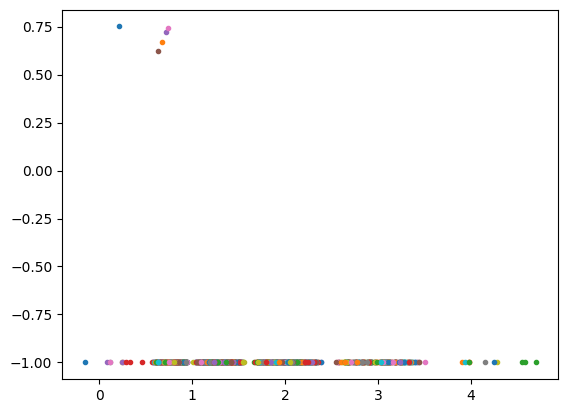

In [148]:
plt.plot([df['redshift']],[df['zcosmosredshift']],".")
#plt.plot([0,1],[0,1],color="k")

In [272]:
fits_file_path='2024PASSAGE/Par023_lines_bagpipes_cat_basic_fit.fits'
astropy_table = Table.read(fits_file_path)
df1 = astropy_table.to_pandas()
df1

hdum=fits.open(fits_file_path)

In [277]:
file_path_class1 = '2024PASSAGE/Par023lines_reconciled_with_flags.dat'
dftb = pd.read_csv(file_path_class1,header=0, comment='#',sep='\s+')

samp_x = np.array(hdum[1].data['ra_obj'])#.data
samp_y = np.array(hdum[1].data['dec_obj'])#.data
cat_x = np.array(dftb['ra_obj'])#dat['ra      ']#.data
cat_y = np.array(dftb['dec_obj'])#dat['dec     ']#.data

sel_samp, idx = match_catalogs(samp_x, samp_y, cat_x, cat_y,max_sep=0.1*u.arcsec)

tt7 = np.ones(shape=(len(np.array(df1['ra_obj'])),)) * (-1)
tt7[sel_samp] = dftb['emline_flag'][idx[sel_samp]]
df1['emline_flag']=tt7

df1
np.unique(tt7)

array([1., 2., 3., 4., 9.])